#**-------------------------------------TRABALHO PST---------------------------------------**

## **NOTEBOOK 5 | Neural Networks Models**

**Realizado por:**
- David Carvalho, nº2242131
- Lígia Carteado Mena, nº2242194
- Rui Filipe Parada, nº2211025

---------------------------------------------------------
**Dataset escolhido:**
- Foods1_CA4 -> Departamento Foods1 da loja 4 do Estado da Califórnia

## **1. IMPORTS**

In [ ]:
!pip install statsforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.8/285.8 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 9.3 MB/s eta 0:00:00


In [ ]:
!pip install neuralforecast[ltsf]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 110.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import io
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from utilsforecast.plotting import plot_series
from sklearn import metrics

from neuralforecast.auto import AutoLSTM, AutoNHITS

from statsforecast import StatsForecast
from neuralforecast import NeuralForecast

from ray import tune
from ray.tune.search.hyperopt import HyperOptSearch
from neuralforecast.losses.pytorch import MAE
from neuralforecast.losses.pytorch import MQLoss

## **2. DATA UPLOAD | DIVISÃO TREINO E TESTE**

### Data upload: fazer upload dos ficheiros 'Foods1_CA4.csv' e 'results_PST4'

In [ ]:
uploaded = files.upload()

if 'Foods1_CA4.csv' in uploaded and 'results_PST4.csv' in uploaded:
    df = pd.read_csv(io.BytesIO(uploaded['Foods1_CA4.csv']), parse_dates=['ds'])
    Models_results = pd.read_csv(io.BytesIO(uploaded['results_PST4.csv']), sep=',')
    print("Both files uploaded successfully.")
else:
    print("Please ensure both 'Foods1_CA4.csv' and 'results_PST4.csv' are uploaded.")

df

Saving Foods1_CA4.csv to Foods1_CA4.csv
Saving results_PST4.csv to results_PST4.csv
Both files uploaded successfully.


,unique_id,ds,y
0,FOODS_1_001_CA_4,2011-01-30,1.0
1,FOODS_1_001_CA_4,2011-01-31,1.0
2,FOODS_1_001_CA_4,2011-02-01,1.0
3,FOODS_1_001_CA_4,2011-02-02,1.0
4,FOODS_1_001_CA_4,2011-02-03,1.0
...,...,...,...
355368,FOODS_1_219_CA_4,2016-06-15,2.0
355369,FOODS_1_219_CA_4,2016-06-16,1.0
355370,FOODS_1_219_CA_4,2016-06-17,4.0
355371,FOODS_1_219_CA_4,2016-06-18,0.0


### Conjunto de treino e teste

In [ ]:
train = df[df['ds'] <= '2016-05-22']
train

,unique_id,ds,y
0,FOODS_1_001_CA_4,2011-01-30,1.0
1,FOODS_1_001_CA_4,2011-01-31,1.0
2,FOODS_1_001_CA_4,2011-02-01,1.0
3,FOODS_1_001_CA_4,2011-02-02,1.0
4,FOODS_1_001_CA_4,2011-02-03,1.0
...,...,...,...
355340,FOODS_1_219_CA_4,2016-05-18,3.0
355341,FOODS_1_219_CA_4,2016-05-19,2.0
355342,FOODS_1_219_CA_4,2016-05-20,2.0
355343,FOODS_1_219_CA_4,2016-05-21,6.0


In [ ]:
test = df[df['ds'] > '2016-05-22'].rename(columns={'y': 'y_test'})
test

,unique_id,ds,y_test
1940,FOODS_1_001_CA_4,2016-05-23,2.0
1941,FOODS_1_001_CA_4,2016-05-24,0.0
1942,FOODS_1_001_CA_4,2016-05-25,0.0
1943,FOODS_1_001_CA_4,2016-05-26,6.0
1944,FOODS_1_001_CA_4,2016-05-27,0.0
...,...,...,...
355368,FOODS_1_219_CA_4,2016-06-15,2.0
355369,FOODS_1_219_CA_4,2016-06-16,1.0
355370,FOODS_1_219_CA_4,2016-06-17,4.0
355371,FOODS_1_219_CA_4,2016-06-18,0.0


In [ ]:
train.shape, test.shape

((349325, 3), (6048, 3))

## **3. MODELING**

### Dataset parameters

In [ ]:
freq = 'D'
season_length = 7
horizon = 28

### Instanciar modelos

Define-se dois modelos de deep learning automáticos — AutoNHITS e AutoLSTM —  com otimização de hiperparâmetros usando Ray Tune + HyperOpt

In [ ]:
nhits_config = {
    "max_steps": 1000,
    "input_size": 2*horizon,
    "learning_rate": tune.loguniform(1e-5, 1e-1),
    "n_pool_kernel_size": tune.choice([[2, 2, 2], [16, 8, 1]]),
    "n_freq_downsample": tune.choice([[168, 24, 1], [24, 12, 1], [1, 1, 1]]),
    "val_check_steps": 50,
    "early_stop_patience_steps": 2,
    "random_seed": tune.randint(1, 10)
}


lstm_config = {
    "max_steps": 1000,
    "input_size": 2 * horizon,
    "encoder_hidden_size":128,
    "decoder_hidden_size":128,
    "learning_rate": tune.loguniform(1e-4, 5e-3),
    "val_check_steps": 50,
    "early_stop_patience_steps": 2,
    "random_seed": tune.randint(1, 10)
}


models = [
    AutoNHITS(
        h=horizon,
        loss=MQLoss(),
        config=nhits_config,
        search_alg=HyperOptSearch(),
        backend='ray',
        num_samples=20
    ),
    AutoLSTM(
        h=horizon,
        loss=MQLoss(),
        config=lstm_config,
        search_alg=HyperOptSearch(),
        backend='ray',
        num_samples=20
    )
]

In [ ]:
# Instanciar pipeline com os modelos definidos
nf = NeuralForecast(models=models,
                    freq=freq
                    )

In [ ]:
import logging
logging.getLogger("ray").setLevel(logging.WARNING)  # Para menos "ruído" no output

nf.fit(df=train, val_size=horizon)

2025-06-14 19:03:29,931	INFO worker.py:1917 -- Started a local Ray instance.
2025-06-14 19:03:31,427	INFO tune.py:253 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `Tuner(...)`.


+--------------------------------------------------------------------+
| Configuration for experiment     _train_tune_2025-06-14_19-03-27   |
+--------------------------------------------------------------------+
| Search algorithm                 SearchGenerator                   |
| Scheduler                        FIFOScheduler                     |
| Number of trials                 20                                |
+--------------------------------------------------------------------+

View detailed results here: /root/ray_results/_train_tune_2025-06-14_19-03-27
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2025-06-14_19-03-27_020465_1199/artifacts/2025-06-14_19-03-31/_train_tune_2025-06-14_19-03-27/driver_artifacts`


(_train_tune pid=3044) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=3044) Seed set to 7
(_train_tune pid=3044) GPU available: True (cuda), used: True
(_train_tune pid=3044) TPU available: False, using: 0 TPU cores
(_train_tune pid=3044) HPU available: False, using: 0 HPUs
(_train_tune pid=3044) 2025-06-14 19:03:43.203923: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=3044) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=3044) E0000 00:00:1749927823.468939    3128 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.120, train_loss_epoch=1.200]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=3044) 
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 135.24it/s]
(_train_tune pid=3044) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.903, train_loss_epoch=1.050, valid_loss=1.480]
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=3044) 
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=3044) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.950, train_loss_epoch=1.030, valid_loss=1.370]
(_train_tune pid=3044) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.719, train_loss_epoch=1.050, valid_loss=1.360]
(_train_tune pid=3044) 


2025-06-14 19:03:56,877	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (168, 24, 1), 'n_pool_kernel_size': (2, 2, 2), 'valid_loss': ('__ref_ph', '004b9a7a')}


(_train_tune pid=3044) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 147.34it/s]
(_train_tune pid=3044) 
Epoch 42:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.923, train_loss_epoch=1.030, valid_loss=1.350]


(_train_tune pid=3212) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=3212) Seed set to 8
(_train_tune pid=3212) GPU available: True (cuda), used: True
(_train_tune pid=3212) TPU available: False, using: 0 TPU cores
(_train_tune pid=3212) HPU available: False, using: 0 HPUs
(_train_tune pid=3212) 2025-06-14 19:04:07.003841: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=3212) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=3212) E0000 00:00:1749927847.026650    3290 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.350, train_loss_epoch=1.140]
(_train_tune pid=3212) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.310, train_loss_epoch=1.060, valid_loss=1.400]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=3212) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.200, train_loss_epoch=1.050, valid_loss=1.370]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=3212) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.120, train_loss_epoch=1.030, valid_loss=1.350]
(_train_tune pid=3212) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.150, train_loss_epoch=1.040, valid_loss=1.340]
(_t

2025-06-14 19:04:18,754	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (168, 24, 1), 'n_pool_kernel_size': (2, 2, 2), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 57:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.981, train_loss_epoch=1.020, valid_loss=1.350]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 201.10it/s]
(_train_tune pid=3212) 
Epoch 57:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.010, train_loss_epoch=1.010, valid_loss=1.340]


(_train_tune pid=3353) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=3353) Seed set to 6
(_train_tune pid=3353) GPU available: True (cuda), used: True
(_train_tune pid=3353) TPU available: False, using: 0 TPU cores
(_train_tune pid=3353) HPU available: False, using: 0 HPUs
(_train_tune pid=3353) 2025-06-14 19:04:28.575924: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=3353) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=3353) E0000 00:00:1749927868.616250    3435 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.400, train_loss_epoch=2.020]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=3353) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.620, train_loss_epoch=1.570, valid_loss=2.480]
(_train_tune pid=3353) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.100, train_loss_epoch=1.460, valid_loss=1.960]
(_train_tune pid=3353) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=3353) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.180, train_loss_epoch=1.220, valid_loss=1.790]
(_train_tune pid=3353) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:

2025-06-14 19:04:57,958	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (1, 1, 1), 'n_pool_kernel_size': (2, 2, 2), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 135:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.230, train_loss_epoch=1.080, valid_loss=1.360]
(_train_tune pid=3353) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 135:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.050, train_loss_epoch=1.030, valid_loss=1.360]


(_train_tune pid=3574) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=3574) Seed set to 9
(_train_tune pid=3574) GPU available: True (cuda), used: True
(_train_tune pid=3574) TPU available: False, using: 0 TPU cores
(_train_tune pid=3574) HPU available: False, using: 0 HPUs
(_train_tune pid=3574) 2025-06-14 19:05:07.416539: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=3574) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=3574) E0000 00:00:1749927907.455804    3646 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=181.0, train_loss_epoch=1.88e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 185.74it/s]
(_train_tune pid=3574) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=10.10, train_loss_epoch=59.30, valid_loss=245.0]
(_train_tune pid=3574) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=172.0, train_loss_epoch=29.80, valid_loss=2.580]
(_train_tune pid=3574) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=2.790, train_loss_epoch=3.180, valid_loss=2.210]
(_train_tune pid=3574) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 210.02it/s]
(_train_tune pid=3574) 
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.730, t

2025-06-14 19:05:21,672	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (24, 12, 1), 'n_pool_kernel_size': (2, 2, 2), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 71:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.710, train_loss_epoch=2.380, valid_loss=2.090]
(_train_tune pid=3574) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 71:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=2.490, train_loss_epoch=1.970, valid_loss=2.100]


(_train_tune pid=3715) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=3715) Seed set to 3
(_train_tune pid=3715) GPU available: True (cuda), used: True
(_train_tune pid=3715) TPU available: False, using: 0 TPU cores
(_train_tune pid=3715) HPU available: False, using: 0 HPUs
(_train_tune pid=3715) 2025-06-14 19:05:32.094190: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=3715) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=3715) E0000 00:00:1749927932.137031    3797 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.570, train_loss_epoch=1.550]
(_train_tune pid=3715) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.240, train_loss_epoch=1.160, valid_loss=1.890]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=3715) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.270, train_loss_epoch=1.120, valid_loss=1.500]
(_train_tune pid=3715) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 150.52it/s]
(_train_tune pid=3715) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.260, train_loss_epoch=1.050, valid_loss=1.410]
(_train_tune pid=3715) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.849, train_loss_e

2025-06-14 19:05:48,246	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (168, 24, 1), 'n_pool_kernel_size': (2, 2, 2), 'valid_loss': ('__ref_ph', '004b9a7a')}


(_train_tune pid=3715) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=3715) 
Epoch 71:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.080, train_loss_epoch=1.040, valid_loss=1.350]


(_train_tune pid=3875) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=3875) Seed set to 7
(_train_tune pid=3875) GPU available: True (cuda), used: True
(_train_tune pid=3875) TPU available: False, using: 0 TPU cores
(_train_tune pid=3875) HPU available: False, using: 0 HPUs
(_train_tune pid=3875) 2025-06-14 19:05:57.969948: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=3875) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=3875) E0000 00:00:1749927958.001445    3953 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.76e+3, train_loss_epoch=2.11e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=3875) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=312.0, train_loss_epoch=447.0, valid_loss=4.23e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=250.0, train_loss_epoch=251.0, valid_loss=336.0]
(_train_tune pid=3875) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=253.0, train_loss_epoch=178.0, valid_loss=220.0]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=3875) 
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=193.0, train_loss_epoch=167.0, valid_loss=330.0]
(_train_tune pid=3875

2025-06-14 19:06:12,393	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (168, 24, 1), 'n_pool_kernel_size': (16, 8, 1), 'valid_loss': ('__ref_ph', '004b9a7a')}


(_train_tune pid=3875) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 144.84it/s]
(_train_tune pid=3875) 
Epoch 71:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=52.50, train_loss_epoch=61.40, valid_loss=49.20]


(_train_tune pid=4023) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=4023) Seed set to 7
(_train_tune pid=4023) GPU available: True (cuda), used: True
(_train_tune pid=4023) TPU available: False, using: 0 TPU cores
(_train_tune pid=4023) HPU available: False, using: 0 HPUs
(_train_tune pid=4023) 2025-06-14 19:06:23.252171: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=4023) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=4023) E0000 00:00:1749927983.275875    4104 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=2.040, train_loss_epoch=3.790]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.610, train_loss_epoch=1.980, valid_loss=2.220]
(_train_tune pid=4023) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.710, train_loss_epoch=1.810, valid_loss=2.070]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=4023) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.240, train_loss_epoch=1.840, valid_loss=2.070]


2025-06-14 19:06:31,858	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (1, 1, 1), 'n_pool_kernel_size': (2, 2, 2), 'valid_loss': ('__ref_ph', '004b9a7a')}


(_train_tune pid=4023) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.900, train_loss_epoch=1.870, valid_loss=2.070]


(_train_tune pid=4153) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=4153) Seed set to 9
(_train_tune pid=4153) GPU available: True (cuda), used: True
(_train_tune pid=4153) TPU available: False, using: 0 TPU cores
(_train_tune pid=4153) HPU available: False, using: 0 HPUs
(_train_tune pid=4153) 2025-06-14 19:06:42.134894: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=4153) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=4153) E0000 00:00:1749928002.160148    4235 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.944, train_loss_epoch=1.120]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 202.85it/s]
(_train_tune pid=4153) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.786, train_loss_epoch=1.060, valid_loss=1.430]
(_train_tune pid=4153) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.922, train_loss_epoch=1.050, valid_loss=1.360]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=4153) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.000, train_loss_epoch=1.040, valid_loss=1.360]
(_train_tune pid=4153) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 211.39it/s]
(_train_tune pid=4153) 
Epoch 35:   0%|     

2025-06-14 19:06:54,950	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (168, 24, 1), 'n_pool_kernel_size': (16, 8, 1), 'valid_loss': ('__ref_ph', '004b9a7a')}


(_train_tune pid=4153) 
Epoch 64:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.960, train_loss_epoch=0.984, valid_loss=1.340]


(_train_tune pid=4300) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=4300) Seed set to 7
(_train_tune pid=4300) GPU available: True (cuda), used: True
(_train_tune pid=4300) TPU available: False, using: 0 TPU cores
(_train_tune pid=4300) HPU available: False, using: 0 HPUs
(_train_tune pid=4300) 2025-06-14 19:07:04.078986: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=4300) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=4300) E0000 00:00:1749928024.120204    4376 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.040, train_loss_epoch=1.090]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=4300) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.896, train_loss_epoch=1.050, valid_loss=1.370]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.951, train_loss_epoch=1.020, valid_loss=1.370]
(_train_tune pid=4300) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.715, train_loss_epoch=1.050, valid_loss=1.350]
(_train_tune pid=4300) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=4300) 
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.010, train_loss_epoch=1.040, valid_loss=1.360]


2025-06-14 19:07:13,237	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (24, 12, 1), 'n_pool_kernel_size': (2, 2, 2), 'valid_loss': ('__ref_ph', '004b9a7a')}


(_train_tune pid=4300) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.996, train_loss_epoch=1.020, valid_loss=1.370]


(_train_tune pid=4431) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=4431) Seed set to 4
(_train_tune pid=4431) GPU available: True (cuda), used: True
(_train_tune pid=4431) TPU available: False, using: 0 TPU cores
(_train_tune pid=4431) HPU available: False, using: 0 HPUs
(_train_tune pid=4431) 2025-06-14 19:07:24.189580: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=4431) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=4431) E0000 00:00:1749928044.213159    4512 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=8.63e+3, train_loss_epoch=5.23e+4]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=4431) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=18.50, train_loss_epoch=13.30, valid_loss=7.06e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 207.90it/s]
(_train_tune pid=4431) 
                                                                       
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=23.00, train_loss_epoch=21.00, valid_loss=2.450]
(_train_tune pid=4431) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=23.10, train_loss_epoch=13.20, valid_loss=2.140]
(_train_tune pid=4431) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|████████

2025-06-14 19:07:35,195	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (24, 12, 1), 'n_pool_kernel_size': (16, 8, 1), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 49: 100%|██████████| 7/7 [00:00<00:00, 50.18it/s, v_num=0, train_loss_step=21.80, train_loss_epoch=415.0, valid_loss=2.100]  
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=4431) 
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=4431) 
Epoch 49: 100%|██████████| 7/7 [00:00<00:00, 37.07it/s, v_num=0, train_loss_step=21.80, train_loss_epoch=20.00, valid_loss=2.080]


(_train_tune pid=4573) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=4573) Seed set to 8
(_train_tune pid=4573) GPU available: True (cuda), used: True
(_train_tune pid=4573) TPU available: False, using: 0 TPU cores
(_train_tune pid=4573) HPU available: False, using: 0 HPUs
(_train_tune pid=4573) 2025-06-14 19:07:45.860217: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=4573) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=4573) E0000 00:00:1749928065.901862    4651 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.700, train_loss_epoch=1.490]
(_train_tune pid=4573) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.470, train_loss_epoch=1.200, valid_loss=1.650]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=4573) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.250, train_loss_epoch=1.100, valid_loss=1.410]
(_train_tune pid=4573) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.170, train_loss_epoch=1.090, valid_loss=1.350]
(_train_tune pid=4573) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 34:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.210, train_loss_epoch=1.130, valid_loss=1.360]


2025-06-14 19:07:54,429	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (168, 24, 1), 'n_pool_kernel_size': (2, 2, 2), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.210, train_loss_epoch=1.090, valid_loss=1.360]
(_train_tune pid=4573) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=4573) 
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.310, train_loss_epoch=1.080, valid_loss=1.360]


(_train_tune pid=4702) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=4702) Seed set to 3
(_train_tune pid=4702) GPU available: True (cuda), used: True
(_train_tune pid=4702) TPU available: False, using: 0 TPU cores
(_train_tune pid=4702) HPU available: False, using: 0 HPUs
(_train_tune pid=4702) 2025-06-14 19:08:05.102281: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=4702) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=4702) E0000 00:00:1749928085.125731    4781 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.620, train_loss_epoch=1.590]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=4702) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.480, train_loss_epoch=1.430, valid_loss=1.940]
(_train_tune pid=4702) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.890, train_loss_epoch=1.540, valid_loss=1.770]
(_train_tune pid=4702) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.370, train_loss_epoch=1.170, valid_loss=1.820]
(_train_tune pid=4702) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.917, train_loss_epoch=1.130, valid_loss=1.460]
(_train_tune pid=4702) 
Validation: |          | 0/? [00:00<?, ?it

2025-06-14 19:08:15,408	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (1, 1, 1), 'n_pool_kernel_size': (16, 8, 1), 'valid_loss': ('__ref_ph', '004b9a7a')}


(_train_tune pid=4702) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 42:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.170, train_loss_epoch=1.180, valid_loss=1.500]


(_train_tune pid=4838) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=4838) Seed set to 9
(_train_tune pid=4838) GPU available: True (cuda), used: True
(_train_tune pid=4838) TPU available: False, using: 0 TPU cores
(_train_tune pid=4838) HPU available: False, using: 0 HPUs
(_train_tune pid=4838) 2025-06-14 19:08:26.154471: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=4838) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=4838) E0000 00:00:1749928106.185606    4916 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.380, train_loss_epoch=1.610]
(_train_tune pid=4838) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.200, train_loss_epoch=1.510, valid_loss=2.070]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=4838) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.330, train_loss_epoch=1.490, valid_loss=1.960]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=4838) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.290, train_loss_epoch=1.330, valid_loss=1.870]
(_train_tune pid=4838) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.010, train_loss_epoch=1.160, valid_loss=1.650]
(_t

2025-06-14 19:08:46,146	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (24, 12, 1), 'n_pool_kernel_size': (16, 8, 1), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 114:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.210, train_loss_epoch=1.050, valid_loss=1.360]
(_train_tune pid=4838) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=4838) 
Epoch 114:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.010, train_loss_epoch=1.060, valid_loss=1.360]


(_train_tune pid=5016) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=5016) Seed set to 2
(_train_tune pid=5016) GPU available: True (cuda), used: True
(_train_tune pid=5016) TPU available: False, using: 0 TPU cores
(_train_tune pid=5016) HPU available: False, using: 0 HPUs
(_train_tune pid=5016) 2025-06-14 19:08:57.102342: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=5016) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=5016) E0000 00:00:1749928137.125902    5099 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.180, train_loss_epoch=1.400]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=5016) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.926, train_loss_epoch=1.140, valid_loss=1.560]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=5016) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.973, train_loss_epoch=1.100, valid_loss=1.410]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=5016) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.100, train_loss_epoch=1.120, valid_loss=1.380]
(_train_tune pid=5016) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train

2025-06-14 19:09:12,975	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (1, 1, 1), 'n_pool_kernel_size': (16, 8, 1), 'valid_loss': ('__ref_ph', '004b9a7a')}


(_train_tune pid=5016) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 78:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.390, train_loss_epoch=1.040, valid_loss=1.350]


(_train_tune pid=5176) GPU available: True (cuda), used: True
(_train_tune pid=5176) TPU available: False, using: 0 TPU cores
(_train_tune pid=5176) HPU available: False, using: 0 HPUs
(_train_tune pid=5176) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=5176) Seed set to 7
(_train_tune pid=5176) 2025-06-14 19:09:24.305795: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=5176) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=5176) E0000 00:00:1749928164.334280    5262 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.130, train_loss_epoch=1.150]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=5176) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.902, train_loss_epoch=1.080, valid_loss=1.400]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=5176) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.980, train_loss_epoch=1.050, valid_loss=1.330]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=5176) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.726, train_loss_epoch=1.060, valid_loss=1.390]


2025-06-14 19:09:32,487	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (1, 1, 1), 'n_pool_kernel_size': (2, 2, 2), 'valid_loss': ('__ref_ph', '004b9a7a')}


(_train_tune pid=5176) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 194.06it/s]
(_train_tune pid=5176) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.080, train_loss_epoch=1.070, valid_loss=1.350]


(_train_tune pid=5311) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=5311) Seed set to 6
(_train_tune pid=5311) GPU available: True (cuda), used: True
(_train_tune pid=5311) TPU available: False, using: 0 TPU cores
(_train_tune pid=5311) HPU available: False, using: 0 HPUs
(_train_tune pid=5311) 2025-06-14 19:09:42.157768: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=5311) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=5311) E0000 00:00:1749928182.198492    5389 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.764, train_loss_epoch=1.070]
(_train_tune pid=5311) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.110, train_loss_epoch=1.050, valid_loss=1.380]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=5311) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.761, train_loss_epoch=1.050, valid_loss=1.370]
(_train_tune pid=5311) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.999, train_loss_epoch=1.030, valid_loss=1.350]
(_train_tune pid=5311) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 34:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.040, train_loss_epoch=1.060, valid_loss=1.370]


2025-06-14 19:09:51,430	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (24, 12, 1), 'n_pool_kernel_size': (16, 8, 1), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.290, train_loss_epoch=1.080, valid_loss=1.370]
(_train_tune pid=5311) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=5311) 
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.980, train_loss_epoch=1.060, valid_loss=1.350]


(_train_tune pid=5440) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=5440) Seed set to 6
(_train_tune pid=5440) GPU available: True (cuda), used: True
(_train_tune pid=5440) TPU available: False, using: 0 TPU cores
(_train_tune pid=5440) HPU available: False, using: 0 HPUs
(_train_tune pid=5440) 2025-06-14 19:10:02.105946: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=5440) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=5440) E0000 00:00:1749928202.129137    5524 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.772, train_loss_epoch=1.090]
(_train_tune pid=5440) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.150, train_loss_epoch=1.100, valid_loss=1.360]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=5440) 
Epoch 20:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.220, train_loss_epoch=1.050, valid_loss=1.360]


2025-06-14 19:10:08,515	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (24, 12, 1), 'n_pool_kernel_size': (2, 2, 2), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.771, train_loss_epoch=1.070, valid_loss=1.360]
(_train_tune pid=5440) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=5440) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.150, train_loss_epoch=1.050, valid_loss=1.360]


(_train_tune pid=5561) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=5561) Seed set to 3
(_train_tune pid=5561) GPU available: True (cuda), used: True
(_train_tune pid=5561) TPU available: False, using: 0 TPU cores
(_train_tune pid=5561) HPU available: False, using: 0 HPUs
(_train_tune pid=5561) 2025-06-14 19:10:19.759537: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=5561) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=5561) E0000 00:00:1749928219.785811    5643 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.270, train_loss_epoch=1.300]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=5561) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.130, train_loss_epoch=1.050, valid_loss=1.540]
(_train_tune pid=5561) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.250, train_loss_epoch=1.080, valid_loss=1.390]
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=5561) 
Validation:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=5561) 
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=5561) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.240, train_loss_epoch=1.040, valid_loss=1.360]
(_train_tune pid=5561) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 10

2025-06-14 19:10:40,370	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (24, 12, 1), 'n_pool_kernel_size': (2, 2, 2), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 114:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.909, train_loss_epoch=1.020, valid_loss=1.340]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=5561) 
Epoch 114:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.793, train_loss_epoch=0.981, valid_loss=1.340]


(_train_tune pid=5749) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=5749) Seed set to 7
(_train_tune pid=5749) GPU available: True (cuda), used: True
(_train_tune pid=5749) TPU available: False, using: 0 TPU cores
(_train_tune pid=5749) HPU available: False, using: 0 HPUs
(_train_tune pid=5749) 2025-06-14 19:10:51.850279: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=5749) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=5749) E0000 00:00:1749928251.873361    5831 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.440, train_loss_epoch=1.530]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.992, train_loss_epoch=1.160, valid_loss=1.940]
(_train_tune pid=5749) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.991, train_loss_epoch=1.070, valid_loss=1.480]
(_train_tune pid=5749) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.739, train_loss_epoch=1.070, valid_loss=1.390]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=5749) 
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.030, train_loss_epoch=1.060, valid_loss=1.370]
(_train_tune pid=5749) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 42:   0%|     

2025-06-14 19:11:07,752	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (1, 1, 1), 'n_pool_kernel_size': (2, 2, 2), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 78:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.040, train_loss_epoch=1.040, valid_loss=1.340]
(_train_tune pid=5749) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 78:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.879, train_loss_epoch=1.040, valid_loss=1.340]


(_train_tune pid=5913) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=5913) Seed set to 7
(_train_tune pid=5913) GPU available: True (cuda), used: True
(_train_tune pid=5913) TPU available: False, using: 0 TPU cores
(_train_tune pid=5913) HPU available: False, using: 0 HPUs
(_train_tune pid=5913) 2025-06-14 19:11:19.030147: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=5913) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=5913) E0000 00:00:1749928279.053415    5995 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.53e+3, train_loss_epoch=3.59e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=5913) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=232.0, train_loss_epoch=312.0, valid_loss=1.37e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 202.58it/s]
(_train_tune pid=5913) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=164.0, train_loss_epoch=91.50, valid_loss=160.0]
(_train_tune pid=5913) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=56.40, train_loss_epoch=64.40, valid_loss=138.0]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=5913) 
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=32.80, train_loss_epoch=28.60, valid_

2025-06-14 19:11:41,068	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (168, 24, 1), 'n_pool_kernel_size': (16, 8, 1), 'valid_loss': ('__ref_ph', '004b9a7a')}
2025-06-14 19:11:41,108	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/_train_tune_2025-06-14_19-03-27' in 0.0328s.


Epoch 128:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=3.110, train_loss_epoch=3.760, valid_loss=2.660]
(_train_tune pid=5913) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 128:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=3.540, train_loss_epoch=2.890, valid_loss=3.260]



INFO:lightning_fabric.utilities.seed:Seed set to 9
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MQLoss        | 5      | eval 
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.6 M  | train
-------------------------------------------------------
2.6 M     Trainable params
5         Non-trainable params
2.6 M     Total params
10.252    Total estimated model params size (MB)
33        Modules in train mode
1         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

+--------------------------------------------------------------------+
| Configuration for experiment     _train_tune_2025-06-14_19-11-57   |
+--------------------------------------------------------------------+
| Search algorithm                 SearchGenerator                   |
| Scheduler                        FIFOScheduler                     |
| Number of trials                 20                                |
+--------------------------------------------------------------------+

View detailed results here: /root/ray_results/_train_tune_2025-06-14_19-11-57
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2025-06-14_19-03-27_020465_1199/artifacts/2025-06-14_19-11-57/_train_tune_2025-06-14_19-11-57/driver_artifacts`


(_train_tune pid=6178) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=6178) Seed set to 9
(_train_tune pid=6178) GPU available: True (cuda), used: True
(_train_tune pid=6178) TPU available: False, using: 0 TPU cores
(_train_tune pid=6178) HPU available: False, using: 0 HPUs
(_train_tune pid=6178) 2025-06-14 19:12:06.929640: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=6178) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=6178) E0000 00:00:1749928326.954050    6256 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.530, train_loss_epoch=1.480]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 173.88it/s]
(_train_tune pid=6178) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.360, train_loss_epoch=1.390, valid_loss=1.390]
(_train_tune pid=6178) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.400, train_loss_epoch=1.600, valid_loss=1.360]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=6178) 
Epoch 27:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.550, train_loss_epoch=1.480, valid_loss=1.360]


2025-06-14 19:12:14,088	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.360, train_loss_epoch=1.420, valid_loss=1.360]
(_train_tune pid=6178) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.330, train_loss_epoch=1.510, valid_loss=1.390]


(_train_tune pid=6295) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=6295) Seed set to 9
(_train_tune pid=6295) GPU available: True (cuda), used: True
(_train_tune pid=6295) TPU available: False, using: 0 TPU cores
(_train_tune pid=6295) HPU available: False, using: 0 HPUs
(_train_tune pid=6295) 2025-06-14 19:12:23.646206: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=6295) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=6295) E0000 00:00:1749928343.689674    6371 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.530, train_loss_epoch=1.470]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.360, train_loss_epoch=1.380, valid_loss=1.370]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=6295) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.360, train_loss_epoch=1.570, valid_loss=1.360]
(_train_tune pid=6295) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 26:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.460, train_loss_epoch=1.490, valid_loss=1.370]


2025-06-14 19:12:30,209	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.310, train_loss_epoch=1.390, valid_loss=1.370]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=6295) 
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 213.18it/s]
(_train_tune pid=6295) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.290, train_loss_epoch=1.480, valid_loss=1.370]


(_train_tune pid=6416) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=6416) Seed set to 7
(_train_tune pid=6416) GPU available: True (cuda), used: True
(_train_tune pid=6416) TPU available: False, using: 0 TPU cores
(_train_tune pid=6416) HPU available: False, using: 0 HPUs
(_train_tune pid=6416) 2025-06-14 19:12:41.641717: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=6416) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=6416) E0000 00:00:1749928361.667764    6498 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.430, train_loss_epoch=1.470]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=6416) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.640, train_loss_epoch=1.620, valid_loss=1.360]
(_train_tune pid=6416) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.640, train_loss_epoch=1.530, valid_loss=1.350]
(_train_tune pid=6416) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.200, train_loss_epoch=1.450, valid_loss=1.350]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=6416) 
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.360, train_loss_epoch=1.400, valid_loss=1.350]


2025-06-14 19:12:48,367	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


(_train_tune pid=6416) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.300, train_loss_epoch=1.430, valid_loss=1.360]


(_train_tune pid=6541) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=6541) Seed set to 1
(_train_tune pid=6541) GPU available: True (cuda), used: True
(_train_tune pid=6541) TPU available: False, using: 0 TPU cores
(_train_tune pid=6541) HPU available: False, using: 0 HPUs
(_train_tune pid=6541) 2025-06-14 19:12:59.719589: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=6541) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=6541) E0000 00:00:1749928379.742731    6624 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.480, train_loss_epoch=1.450]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 147.61it/s]
(_train_tune pid=6541) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.370, train_loss_epoch=1.390, valid_loss=1.380]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.600, train_loss_epoch=1.530, valid_loss=1.370]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=6541) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.330, train_loss_epoch=1.410, valid_loss=1.350]
(_train_tune pid=6541) 
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=6541) 
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=6541) 
Epoch 35:   0%|          | 0/

2025-06-14 19:13:10,701	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 71:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.780, train_loss_epoch=1.470, valid_loss=1.350]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 71:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.480, train_loss_epoch=1.390, valid_loss=1.360]


(_train_tune pid=6683) GPU available: True (cuda), used: True
(_train_tune pid=6683) TPU available: False, using: 0 TPU cores
(_train_tune pid=6683) HPU available: False, using: 0 HPUs
(_train_tune pid=6683) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=6683) Seed set to 9
(_train_tune pid=6683) 2025-06-14 19:13:21.020237: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=6683) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=6683) E0000 00:00:1749928401.043716    6761 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.520, train_loss_epoch=1.460]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 186.08it/s]
(_train_tune pid=6683) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.370, train_loss_epoch=1.390, valid_loss=1.360]
(_train_tune pid=6683) 
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=6683) 
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=6683) 
Epoch 19:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.530, train_loss_epoch=1.380, valid_loss=1.360]


2025-06-14 19:13:26,382	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.360, train_loss_epoch=1.570, valid_loss=1.360]
(_train_tune pid=6683) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.140, train_loss_epoch=1.370, valid_loss=1.360]


(_train_tune pid=6797) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=6797) Seed set to 7
(_train_tune pid=6797) GPU available: True (cuda), used: True
(_train_tune pid=6797) TPU available: False, using: 0 TPU cores
(_train_tune pid=6797) HPU available: False, using: 0 HPUs
(_train_tune pid=6797) 2025-06-14 19:13:37.260945: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=6797) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=6797) E0000 00:00:1749928417.287098    6880 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.420, train_loss_epoch=1.470]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=6797) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.630, train_loss_epoch=1.620, valid_loss=1.360]
(_train_tune pid=6797) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.640, train_loss_epoch=1.520, valid_loss=1.350]
(_train_tune pid=6797) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.190, train_loss_epoch=1.450, valid_loss=1.350]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=6797) 
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.360, train_loss_epoch=1.400, valid_loss=1.350]
Val

2025-06-14 19:13:45,433	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 42:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.580, train_loss_epoch=1.480, valid_loss=1.360]
(_train_tune pid=6797) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 42:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.210, train_loss_epoch=1.370, valid_loss=1.360]


(_train_tune pid=6927) GPU available: True (cuda), used: True
(_train_tune pid=6927) TPU available: False, using: 0 TPU cores
(_train_tune pid=6927) HPU available: False, using: 0 HPUs
(_train_tune pid=6927) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=6927) Seed set to 6
(_train_tune pid=6927) 2025-06-14 19:13:56.429873: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=6927) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=6927) E0000 00:00:1749928436.476462    7009 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.220, train_loss_epoch=1.500]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.540, train_loss_epoch=1.510, valid_loss=1.390]
(_train_tune pid=6927) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.320, train_loss_epoch=1.440, valid_loss=1.360]
(_train_tune pid=6927) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 26:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.390, train_loss_epoch=1.430, valid_loss=1.360]


2025-06-14 19:14:02,974	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.350, train_loss_epoch=1.470, valid_loss=1.360]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=6927) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.670, train_loss_epoch=1.460, valid_loss=1.360]


(_train_tune pid=7050) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=7050) Seed set to 8
(_train_tune pid=7050) GPU available: True (cuda), used: True
(_train_tune pid=7050) TPU available: False, using: 0 TPU cores
(_train_tune pid=7050) HPU available: False, using: 0 HPUs
(_train_tune pid=7050) 2025-06-14 19:14:13.163750: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=7050) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=7050) E0000 00:00:1749928453.187208    7128 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.640, train_loss_epoch=1.470]
(_train_tune pid=7050) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.370, train_loss_epoch=1.410, valid_loss=1.360]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=2.430, train_loss_epoch=1.520, valid_loss=1.360]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=7050) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.620, train_loss_epoch=1.430, valid_loss=1.360]
(_train_tune pid=7050) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.360, train_loss_epoch=1.430, valid_loss=1.350]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/

2025-06-14 19:14:24,922	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 78:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.430, train_loss_epoch=1.330, valid_loss=1.310]
(_train_tune pid=7050) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 78:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.180, train_loss_epoch=1.230, valid_loss=1.310]


(_train_tune pid=7191) GPU available: True (cuda), used: True
(_train_tune pid=7191) TPU available: False, using: 0 TPU cores
(_train_tune pid=7191) HPU available: False, using: 0 HPUs
(_train_tune pid=7191) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=7191) Seed set to 8
(_train_tune pid=7191) 2025-06-14 19:14:34.112601: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=7191) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=7191) E0000 00:00:1749928474.159896    7266 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.650, train_loss_epoch=1.480]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=7191) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.360, train_loss_epoch=1.420, valid_loss=1.370]
(_train_tune pid=7191) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=2.440, train_loss_epoch=1.520, valid_loss=1.370]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=7191) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.620, train_loss_epoch=1.430, valid_loss=1.360]
(_train_tune pid=7191) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.380, train_loss_epoch=1.450, valid_loss=1.360]
(_t

2025-06-14 19:14:45,931	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 78:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.430, train_loss_epoch=1.340, valid_loss=1.310]
(_train_tune pid=7191) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 78:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.190, train_loss_epoch=1.240, valid_loss=1.310]


(_train_tune pid=7329) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=7329) Seed set to 9
(_train_tune pid=7329) GPU available: True (cuda), used: True
(_train_tune pid=7329) TPU available: False, using: 0 TPU cores
(_train_tune pid=7329) HPU available: False, using: 0 HPUs
(_train_tune pid=7329) 2025-06-14 19:14:56.165317: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=7329) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=7329) E0000 00:00:1749928496.190615    7407 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.550, train_loss_epoch=1.480]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=7329) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.360, train_loss_epoch=1.390, valid_loss=1.400]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=7329) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.400, train_loss_epoch=1.600, valid_loss=1.360]
(_train_tune pid=7329) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.330, train_loss_epoch=1.410, valid_loss=1.350]
(_train_tune pid=7329) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=7329) 
Epoch 33:   0%|          | 0/7 [00:00<

2025-06-14 19:15:03,801	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.430, train_loss_epoch=1.440, valid_loss=1.360]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=7329) 
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.330, train_loss_epoch=1.370, valid_loss=1.360]


(_train_tune pid=7452) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=7452) Seed set to 3
(_train_tune pid=7452) GPU available: True (cuda), used: True
(_train_tune pid=7452) TPU available: False, using: 0 TPU cores
(_train_tune pid=7452) HPU available: False, using: 0 HPUs
(_train_tune pid=7452) 2025-06-14 19:15:14.133971: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=7452) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=7452) E0000 00:00:1749928514.179134    7533 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.420, train_loss_epoch=1.550]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=7452) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.630, train_loss_epoch=1.510, valid_loss=1.350]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 20:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.380, train_loss_epoch=1.420, valid_loss=1.360]


2025-06-14 19:15:20,294	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.930, train_loss_epoch=1.540, valid_loss=1.360]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=7452) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.280, train_loss_epoch=1.350, valid_loss=1.360]


(_train_tune pid=7570) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=7570) Seed set to 6
(_train_tune pid=7570) GPU available: True (cuda), used: True
(_train_tune pid=7570) TPU available: False, using: 0 TPU cores
(_train_tune pid=7570) HPU available: False, using: 0 HPUs
(_train_tune pid=7570) 2025-06-14 19:15:31.848099: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=7570) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=7570) E0000 00:00:1749928531.871961    7658 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.230, train_loss_epoch=1.500]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 208.11it/s]
(_train_tune pid=7570) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.540, train_loss_epoch=1.510, valid_loss=1.370]
(_train_tune pid=7570) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.310, train_loss_epoch=1.440, valid_loss=1.350]
(_train_tune pid=7570) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.350, train_loss_epoch=1.470, valid_loss=1.350]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=7570) 
Epoch 33:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.430, train_loss_epoch=1.520, valid_loss=1

2025-06-14 19:15:38,651	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.450, train_loss_epoch=1.540, valid_loss=1.360]
(_train_tune pid=7570) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.390, train_loss_epoch=1.480, valid_loss=1.360]


(_train_tune pid=7697) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=7697) Seed set to 4
(_train_tune pid=7697) GPU available: True (cuda), used: True
(_train_tune pid=7697) TPU available: False, using: 0 TPU cores
(_train_tune pid=7697) HPU available: False, using: 0 HPUs
(_train_tune pid=7697) 2025-06-14 19:15:50.542534: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=7697) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=7697) E0000 00:00:1749928550.569391    7783 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.710, train_loss_epoch=1.780]
(_train_tune pid=7697) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.430, train_loss_epoch=1.460, valid_loss=1.500]
(_train_tune pid=7697) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.350, train_loss_epoch=1.430, valid_loss=1.350]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=7697) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.300, train_loss_epoch=1.370, valid_loss=1.350]


2025-06-14 19:15:57,400	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


(_train_tune pid=7697) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.710, train_loss_epoch=1.480, valid_loss=1.350]


(_train_tune pid=7825) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=7825) Seed set to 4
(_train_tune pid=7825) GPU available: True (cuda), used: True
(_train_tune pid=7825) TPU available: False, using: 0 TPU cores
(_train_tune pid=7825) HPU available: False, using: 0 HPUs
(_train_tune pid=7825) 2025-06-14 19:16:07.221367: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=7825) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=7825) E0000 00:00:1749928567.256814    7905 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.550, train_loss_epoch=1.520]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.430, train_loss_epoch=1.470, valid_loss=1.390]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=7825) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.350, train_loss_epoch=1.430, valid_loss=1.350]
(_train_tune pid=7825) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 26:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.380, train_loss_epoch=1.420, valid_loss=1.360]


2025-06-14 19:16:14,173	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.300, train_loss_epoch=1.370, valid_loss=1.360]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 222.73it/s]
(_train_tune pid=7825) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.720, train_loss_epoch=1.490, valid_loss=1.360]


(_train_tune pid=7942) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=7942) Seed set to 6
(_train_tune pid=7942) GPU available: True (cuda), used: True
(_train_tune pid=7942) TPU available: False, using: 0 TPU cores
(_train_tune pid=7942) HPU available: False, using: 0 HPUs
(_train_tune pid=7942) 2025-06-14 19:16:25.014129: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=7942) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=7942) E0000 00:00:1749928585.041372    8028 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.250, train_loss_epoch=1.520]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=7942) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.540, train_loss_epoch=1.510, valid_loss=1.380]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.300, train_loss_epoch=1.430, valid_loss=1.350]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=7942) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.330, train_loss_epoch=1.460, valid_loss=1.350]
(_train_tune pid=7942) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.450, train_loss_epoch=1.530, valid_loss=1.350]
(_train_tune pid=7942) 
Val

2025-06-14 19:16:33,189	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 49: 100%|██████████| 7/7 [00:00<00:00, 81.22it/s, v_num=0, train_loss_step=1.380, train_loss_epoch=1.530, valid_loss=1.360]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 49: 100%|██████████| 7/7 [00:00<00:00, 54.06it/s, v_num=0, train_loss_step=1.380, train_loss_epoch=1.580, valid_loss=1.360]


(_train_tune pid=8077) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=8077) Seed set to 8
(_train_tune pid=8077) GPU available: True (cuda), used: True
(_train_tune pid=8077) TPU available: False, using: 0 TPU cores
(_train_tune pid=8077) HPU available: False, using: 0 HPUs
(_train_tune pid=8077) 2025-06-14 19:16:43.780463: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=8077) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=8077) E0000 00:00:1749928603.806213    8155 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]
                                                                           
Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.660, train_loss_epoch=1.470]
(_train_tune pid=8077) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.370, train_loss_epoch=1.410, valid_loss=1.370]
(_train_tune pid=8077) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=2.450, train_loss_epoch=1.520, valid_loss=1.370]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.580, train_loss_epoch=1.410, valid_loss=1.360]
(_train_tune pid=8077) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 34:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step

2025-06-14 19:16:51,494	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.380, train_loss_epoch=1.410, valid_loss=1.360]
(_train_tune pid=8077) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.600, train_loss_epoch=1.400, valid_loss=1.360]


(_train_tune pid=8202) GPU available: True (cuda), used: True
(_train_tune pid=8202) TPU available: False, using: 0 TPU cores
(_train_tune pid=8202) HPU available: False, using: 0 HPUs
(_train_tune pid=8202) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=8202) Seed set to 6
(_train_tune pid=8202) 2025-06-14 19:17:03.152779: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=8202) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=8202) E0000 00:00:1749928623.179527    8286 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.230, train_loss_epoch=1.490]
(_train_tune pid=8202) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.550, train_loss_epoch=1.520, valid_loss=1.360]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.320, train_loss_epoch=1.430, valid_loss=1.360]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=8202) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.330, train_loss_epoch=1.470, valid_loss=1.350]
(_train_tune pid=8202) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.450, train_loss_epoch=1.540, valid_loss=1.360]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/

2025-06-14 19:17:11,405	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 49: 100%|██████████| 7/7 [00:00<00:00, 79.15it/s, v_num=0, train_loss_step=1.360, train_loss_epoch=1.530, valid_loss=1.360]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=8202) 
Epoch 49: 100%|██████████| 7/7 [00:00<00:00, 43.51it/s, v_num=0, train_loss_step=1.360, train_loss_epoch=1.580, valid_loss=1.350]


(_train_tune pid=8337) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=8337) Seed set to 3
(_train_tune pid=8337) GPU available: True (cuda), used: True
(_train_tune pid=8337) TPU available: False, using: 0 TPU cores
(_train_tune pid=8337) HPU available: False, using: 0 HPUs
(_train_tune pid=8337) 2025-06-14 19:17:23.547371: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=8337) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=8337) E0000 00:00:1749928643.572405    8422 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=2.090, train_loss_epoch=2.280]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=8337) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.630, train_loss_epoch=1.510, valid_loss=2.080]
(_train_tune pid=8337) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.920, train_loss_epoch=1.530, valid_loss=1.350]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=8337) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.500, train_loss_epoch=1.440, valid_loss=1.350]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=8337) 
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train

2025-06-14 19:17:33,319	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 57:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.640, train_loss_epoch=1.650, valid_loss=1.350]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 57:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.650, train_loss_epoch=1.650, valid_loss=1.350]


(_train_tune pid=8479) GPU available: True (cuda), used: True
(_train_tune pid=8479) TPU available: False, using: 0 TPU cores
(_train_tune pid=8479) HPU available: False, using: 0 HPUs
(_train_tune pid=8479) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=8479) Seed set to 8
(_train_tune pid=8479) 2025-06-14 19:17:44.789715: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=8479) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=8479) E0000 00:00:1749928664.813565    8561 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.680, train_loss_epoch=1.490]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.360, train_loss_epoch=1.410, valid_loss=1.380]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=8479) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=2.420, train_loss_epoch=1.520, valid_loss=1.350]
(_train_tune pid=8479) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.610, train_loss_epoch=1.430, valid_loss=1.350]
(_train_tune pid=8479) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.370, train_loss_epoch=1.460, valid_loss=1.350]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/

2025-06-14 19:17:52,282	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 42:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.550, train_loss_epoch=1.510, valid_loss=1.360]
(_train_tune pid=8479) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 42:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.470, train_loss_epoch=1.450, valid_loss=1.360]


(_train_tune pid=8608) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=8608) Seed set to 8
(_train_tune pid=8608) GPU available: True (cuda), used: True
(_train_tune pid=8608) TPU available: False, using: 0 TPU cores
(_train_tune pid=8608) HPU available: False, using: 0 HPUs
(_train_tune pid=8608) 2025-06-14 19:18:03.184590: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=8608) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=8608) E0000 00:00:1749928683.211176    8688 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.650, train_loss_epoch=1.480]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.370, train_loss_epoch=1.410, valid_loss=1.360]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=8608) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=2.420, train_loss_epoch=1.520, valid_loss=1.350]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=8608) 
Epoch 26:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.740, train_loss_epoch=1.560, valid_loss=1.360]


2025-06-14 19:18:10,040	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}
2025-06-14 19:18:10,065	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/_train_tune_2025-06-14_19-11-57' in 0.0221s.
INFO:lightning_fabric.utilities.seed:Seed set to 8


Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.610, train_loss_epoch=1.430, valid_loss=1.360]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.340, train_loss_epoch=1.470, valid_loss=1.350]



INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MQLoss        | 5      | eval 
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | hist_encoder | LSTM          | 199 K  | train
4 | mlp_decoder  | MLP           | 17.2 K | train
-------------------------------------------------------
216 K     Trainable params
5         Non-trainable params
216 K     Total params
0.865     Total estimated model params size (MB)
9         Modules in train mode
1         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
forecasts = nf.predict()
forecasts

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

,unique_id,ds,AutoNHITS-median,AutoNHITS-lo-90,AutoNHITS-lo-80,AutoNHITS-hi-80,AutoNHITS-hi-90,AutoLSTM-median,AutoLSTM-lo-90,AutoLSTM-lo-80,AutoLSTM-hi-80,AutoLSTM-hi-90
0,FOODS_1_001_CA_4,2016-05-23,0.000570,-0.024114,-0.018656,1.077417,1.394878,0.010484,-0.121673,-0.009859,0.987194,1.425882
1,FOODS_1_001_CA_4,2016-05-24,0.000063,-0.025770,-0.018027,1.090967,1.430549,0.012007,-0.128183,-0.009449,1.067754,1.540595
2,FOODS_1_001_CA_4,2016-05-25,-0.001265,-0.020379,-0.014025,1.078234,1.468905,0.010544,-0.120248,-0.009076,0.983091,1.420167
3,FOODS_1_001_CA_4,2016-05-26,0.013880,-0.028729,-0.025139,1.082085,1.465877,0.009736,-0.120215,-0.010623,0.951530,1.378647
4,FOODS_1_001_CA_4,2016-05-27,-0.006201,-0.020895,-0.018997,1.090077,1.497873,0.009308,-0.118908,-0.011124,0.925410,1.343441
...,...,...,...,...,...,...,...,...,...,...,...,...
6043,FOODS_1_219_CA_4,2016-06-15,1.211085,-0.023975,0.031670,3.893807,4.958648,0.989542,-0.200393,0.036619,2.734977,3.458234
6044,FOODS_1_219_CA_4,2016-06-16,1.177512,-0.013824,0.023554,3.787918,4.841720,0.987107,-0.205285,0.031824,2.693017,3.397021
6045,FOODS_1_219_CA_4,2016-06-17,1.230846,-0.014513,0.002961,3.914200,4.784177,0.986382,-0.199190,0.033352,2.670127,3.363125
6046,FOODS_1_219_CA_4,2016-06-18,1.113451,-0.046679,0.025457,3.665020,4.744458,1.008689,-0.283940,0.062819,3.399448,4.439619


In [ ]:
cv_nn = nf.cross_validation(train,
                            n_windows=1,
                            step_size=horizon)

+--------------------------------------------------------------------+
| Configuration for experiment     _train_tune_2025-06-14_19-18-22   |
+--------------------------------------------------------------------+
| Search algorithm                 SearchGenerator                   |
| Scheduler                        FIFOScheduler                     |
| Number of trials                 20                                |
+--------------------------------------------------------------------+

View detailed results here: /root/ray_results/_train_tune_2025-06-14_19-18-22
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2025-06-14_19-03-27_020465_1199/artifacts/2025-06-14_19-18-22/_train_tune_2025-06-14_19-18-22/driver_artifacts`
(raylet) Warning: The actor ImplicitFunc is very large (13 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.


(_train_tune pid=8786) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=8786) Seed set to 7
(_train_tune pid=8786) GPU available: True (cuda), used: True
(_train_tune pid=8786) TPU available: False, using: 0 TPU cores
(_train_tune pid=8786) HPU available: False, using: 0 HPUs
(_train_tune pid=8786) 2025-06-14 19:18:34.026493: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=8786) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=8786) E0000 00:00:1749928714.050416    8872 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.190, train_loss_epoch=1.210]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=8786) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.910, train_loss_epoch=1.060, valid_loss=1.140]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.954, train_loss_epoch=1.050, valid_loss=1.040]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=8786) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.743, train_loss_epoch=1.050, valid_loss=1.020]
(_train_tune pid=8786) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.979, train_loss_epoch=1.030, valid_loss=1.040]
(_train_tune pid=8786) 
Val

2025-06-14 19:18:47,170	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (168, 24, 1), 'n_pool_kernel_size': (2, 2, 2), 'valid_loss': ('__ref_ph', '004b9a7a')}


(_train_tune pid=8786) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 64:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.090, train_loss_epoch=1.040, valid_loss=1.010]


(_train_tune pid=8938) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=8938) Seed set to 8
(_train_tune pid=8938) GPU available: True (cuda), used: True
(_train_tune pid=8938) TPU available: False, using: 0 TPU cores
(_train_tune pid=8938) HPU available: False, using: 0 HPUs
(_train_tune pid=8938) 2025-06-14 19:18:57.614546: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=8938) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=8938) E0000 00:00:1749928737.640923    9022 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.310, train_loss_epoch=1.070]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=8938) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.350, train_loss_epoch=1.070, valid_loss=1.050]
(_train_tune pid=8938) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.160, train_loss_epoch=1.050, valid_loss=1.050]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=8938) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.120, train_loss_epoch=1.060, valid_loss=1.040]
(_train_tune pid=8938) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=8938) 
Epoch 35:   0%|          | 0/7 [00:00<

2025-06-14 19:19:09,484	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (168, 24, 1), 'n_pool_kernel_size': (2, 2, 2), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 57:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.965, train_loss_epoch=1.020, valid_loss=1.020]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 57:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.040, train_loss_epoch=1.040, valid_loss=1.020]


(_train_tune pid=9087) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=9087) Seed set to 6
(_train_tune pid=9087) GPU available: True (cuda), used: True
(_train_tune pid=9087) TPU available: False, using: 0 TPU cores
(_train_tune pid=9087) HPU available: False, using: 0 HPUs
(_train_tune pid=9087) 2025-06-14 19:19:20.673585: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=9087) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=9087) E0000 00:00:1749928760.696731    9171 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.450, train_loss_epoch=2.050]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 202.68it/s]
(_train_tune pid=9087) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.470, train_loss_epoch=1.540, valid_loss=2.220]
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=9087) 
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=9087) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.080, train_loss_epoch=1.410, valid_loss=1.630]
(_train_tune pid=9087) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.170, train_loss_epoch=1.210, valid_loss=1.470]
(_train_tune pid=9087) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.400, train_loss_e

2025-06-14 19:19:43,556	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (1, 1, 1), 'n_pool_kernel_size': (2, 2, 2), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 121:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.170, train_loss_epoch=1.080, valid_loss=1.030]
(_train_tune pid=9087) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 121:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.160, train_loss_epoch=1.060, valid_loss=1.030]


(_train_tune pid=9282) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=9282) Seed set to 9
(_train_tune pid=9282) GPU available: True (cuda), used: True
(_train_tune pid=9282) TPU available: False, using: 0 TPU cores
(_train_tune pid=9282) HPU available: False, using: 0 HPUs
(_train_tune pid=9282) 2025-06-14 19:19:54.410351: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=9282) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=9282) E0000 00:00:1749928794.447478    9361 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=4.530, train_loss_epoch=3.120]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=9282) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.520, train_loss_epoch=2.240, valid_loss=4.960]
(_train_tune pid=9282) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.460, train_loss_epoch=1.650, valid_loss=1.800]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=9282) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=2.310, train_loss_epoch=4.660, valid_loss=1.720]
(_train_tune pid=9282) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 34:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=3.100, train_loss_epoch=2.350, valid_loss=2.750]


2025-06-14 19:20:03,435	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (24, 12, 1), 'n_pool_kernel_size': (2, 2, 2), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.630, train_loss_epoch=2.240, valid_loss=2.750]
(_train_tune pid=9282) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.760, train_loss_epoch=2.050, valid_loss=1.820]


(_train_tune pid=9416) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=9416) Seed set to 3
(_train_tune pid=9416) GPU available: True (cuda), used: True
(_train_tune pid=9416) TPU available: False, using: 0 TPU cores
(_train_tune pid=9416) HPU available: False, using: 0 HPUs
(_train_tune pid=9416) 2025-06-14 19:20:14.445987: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=9416) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=9416) E0000 00:00:1749928814.472192    9496 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
                                                                           
Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.540, train_loss_epoch=1.550]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=9416) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.210, train_loss_epoch=1.170, valid_loss=1.570]
(_train_tune pid=9416) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.260, train_loss_epoch=1.100, valid_loss=1.160]
(_train_tune pid=9416) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.270, train_loss_epoch=1.070, valid_loss=1.060]
(_train_tune pid=9416) 
Validation: |          | 0/? [00:00<?, 

2025-06-14 19:20:27,326	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (168, 24, 1), 'n_pool_kernel_size': (2, 2, 2), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 64:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.751, train_loss_epoch=1.050, valid_loss=1.020]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=9416) 
Epoch 64:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.230, train_loss_epoch=1.080, valid_loss=1.020]


(_train_tune pid=9566) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=9566) Seed set to 7
(_train_tune pid=9566) GPU available: True (cuda), used: True
(_train_tune pid=9566) TPU available: False, using: 0 TPU cores
(_train_tune pid=9566) HPU available: False, using: 0 HPUs
(_train_tune pid=9566) 2025-06-14 19:20:39.248811: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=9566) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=9566) E0000 00:00:1749928839.272658    9652 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=181.0, train_loss_epoch=126.0]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=4.45e+3, train_loss_epoch=2.34e+3, valid_loss=1.03e+4]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=9566) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=99.90, train_loss_epoch=117.0, valid_loss=6.79e+3]
(_train_tune pid=9566) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=5.160, train_loss_epoch=30.70, valid_loss=75.60]
(_train_tune pid=9566) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=9566) 
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_los

2025-06-14 19:20:56,113	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (168, 24, 1), 'n_pool_kernel_size': (16, 8, 1), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 92:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=2.740, train_loss_epoch=4.840, valid_loss=6.990]
(_train_tune pid=9566) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=9566) 
Epoch 92:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=6.550, train_loss_epoch=4.490, valid_loss=6.450]


(_train_tune pid=9732) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=9732) Seed set to 7
(_train_tune pid=9732) GPU available: True (cuda), used: True
(_train_tune pid=9732) TPU available: False, using: 0 TPU cores
(_train_tune pid=9732) HPU available: False, using: 0 HPUs
(_train_tune pid=9732) 2025-06-14 19:21:06.538549: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=9732) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=9732) E0000 00:00:1749928866.563274    9817 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=3.440, train_loss_epoch=4.300]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=9732) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=59.70, train_loss_epoch=82.90, valid_loss=3.770]
(_train_tune pid=9732) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=26.10, train_loss_epoch=31.40, valid_loss=79.20]


2025-06-14 19:21:13,100	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (1, 1, 1), 'n_pool_kernel_size': (2, 2, 2), 'valid_loss': ('__ref_ph', '004b9a7a')}


(_train_tune pid=9732) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=24.50, train_loss_epoch=28.20, valid_loss=28.30]


(_train_tune pid=9853) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=9853) Seed set to 9
(_train_tune pid=9853) GPU available: True (cuda), used: True
(_train_tune pid=9853) TPU available: False, using: 0 TPU cores
(_train_tune pid=9853) HPU available: False, using: 0 HPUs
(_train_tune pid=9853) 2025-06-14 19:21:24.864012: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=9853) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=9853) E0000 00:00:1749928884.884083    9941 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when o

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.935, train_loss_epoch=1.130]
(_train_tune pid=9853) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.765, train_loss_epoch=1.060, valid_loss=1.080]
(_train_tune pid=9853) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.883, train_loss_epoch=1.030, valid_loss=1.050]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=9853) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.010, train_loss_epoch=1.080, valid_loss=1.060]
(_train_tune pid=9853) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.885, train_loss_epoch=1.070, valid_loss=1.050]
(_train_tune pid=9853) 
Validation: |          | 0/? [00:00<?, ?it

2025-06-14 19:21:36,851	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (168, 24, 1), 'n_pool_kernel_size': (16, 8, 1), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 57:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.290, train_loss_epoch=1.030, valid_loss=1.040]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=9853) 
Epoch 57:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.958, train_loss_epoch=0.958, valid_loss=1.030]


(_train_tune pid=10005) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=10005) Seed set to 7
(_train_tune pid=10005) GPU available: True (cuda), used: True
(_train_tune pid=10005) TPU available: False, using: 0 TPU cores
(_train_tune pid=10005) HPU available: False, using: 0 HPUs
(_train_tune pid=10005) 2025-06-14 19:21:47.588875: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=10005) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=10005) E0000 00:00:1749928907.615614   10089 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.110, train_loss_epoch=1.110]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=10005) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.894, train_loss_epoch=1.040, valid_loss=1.060]
(_train_tune pid=10005) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.944, train_loss_epoch=1.030, valid_loss=1.040]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=10005) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.728, train_loss_epoch=1.040, valid_loss=1.020]
(_train_tune pid=10005) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_st

2025-06-14 19:22:00,417	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (24, 12, 1), 'n_pool_kernel_size': (2, 2, 2), 'valid_loss': ('__ref_ph', '004b9a7a')}


(_train_tune pid=10005) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 64:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.080, train_loss_epoch=1.040, valid_loss=1.020]


(_train_tune pid=10154) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=10154) Seed set to 4
(_train_tune pid=10154) GPU available: True (cuda), used: True
(_train_tune pid=10154) TPU available: False, using: 0 TPU cores
(_train_tune pid=10154) HPU available: False, using: 0 HPUs
(_train_tune pid=10154) 2025-06-14 19:22:11.604250: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=10154) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=10154) E0000 00:00:1749928931.630934   10239 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=2.79e+5, train_loss_epoch=3.18e+5]
(_train_tune pid=10154) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=8.91e+3, train_loss_epoch=7.58e+3, valid_loss=2.48e+5]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=10154) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=9.71e+3, train_loss_epoch=1.1e+4, valid_loss=1.14e+4]
(_train_tune pid=10154) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=4.83e+3, train_loss_epoch=4.88e+3, valid_loss=1.38e+4]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=10154) 
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=3.15e+3, train_loss_epoch=3

2025-06-14 19:22:26,759	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (24, 12, 1), 'n_pool_kernel_size': (16, 8, 1), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 78:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.39e+3, train_loss_epoch=1.64e+3, valid_loss=3.19e+3]
(_train_tune pid=10154) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 78:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=433.0, train_loss_epoch=780.0, valid_loss=1.38e+3]


(_train_tune pid=10315) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=10315) Seed set to 8
(_train_tune pid=10315) GPU available: True (cuda), used: True
(_train_tune pid=10315) TPU available: False, using: 0 TPU cores
(_train_tune pid=10315) HPU available: False, using: 0 HPUs
(_train_tune pid=10315) 2025-06-14 19:22:37.652882: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=10315) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=10315) E0000 00:00:1749928957.676395   10401 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=2.030, train_loss_epoch=1.670]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=10315) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.990, train_loss_epoch=1.630, valid_loss=1.920]
(_train_tune pid=10315) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.780, train_loss_epoch=1.600, valid_loss=1.700]
(_train_tune pid=10315) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.610, train_loss_epoch=1.590, valid_loss=1.710]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=10315) 
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_st

2025-06-14 19:22:52,517	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (168, 24, 1), 'n_pool_kernel_size': (2, 2, 2), 'valid_loss': ('__ref_ph', '004b9a7a')}


(_train_tune pid=10315) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=10315) 
Epoch 78:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.310, train_loss_epoch=1.160, valid_loss=1.070]


(_train_tune pid=10474) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=10474) Seed set to 3
(_train_tune pid=10474) GPU available: True (cuda), used: True
(_train_tune pid=10474) TPU available: False, using: 0 TPU cores
(_train_tune pid=10474) HPU available: False, using: 0 HPUs
(_train_tune pid=10474) 2025-06-14 19:23:04.490946: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=10474) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=10474) E0000 00:00:1749928984.515162   10564 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.200, train_loss_epoch=1.260]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=10474) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.150, train_loss_epoch=1.100, valid_loss=1.160]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=10474) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.260, train_loss_epoch=1.080, valid_loss=1.090]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=10474) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.290, train_loss_epoch=1.090, valid_loss=1.170]
(_train_tune pid=10474) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, t

2025-06-14 19:23:20,251	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (1, 1, 1), 'n_pool_kernel_size': (16, 8, 1), 'valid_loss': ('__ref_ph', '004b9a7a')}


(_train_tune pid=10474) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 78:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.020, train_loss_epoch=1.030, valid_loss=1.040]


(_train_tune pid=10640) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=10640) Seed set to 9
(_train_tune pid=10640) GPU available: True (cuda), used: True
(_train_tune pid=10640) TPU available: False, using: 0 TPU cores
(_train_tune pid=10640) HPU available: False, using: 0 HPUs
(_train_tune pid=10640) 2025-06-14 19:23:30.658567: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=10640) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=10640) E0000 00:00:1749929010.704949   10720 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.360, train_loss_epoch=1.610]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=10640) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.200, train_loss_epoch=1.520, valid_loss=1.740]
(_train_tune pid=10640) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.280, train_loss_epoch=1.450, valid_loss=1.640]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=10640) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.280, train_loss_epoch=1.350, valid_loss=1.580]
(_train_tune pid=10640) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.993, train_loss_epoch=1.180, valid_loss=1.380]

2025-06-14 19:23:55,617	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (24, 12, 1), 'n_pool_kernel_size': (16, 8, 1), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 142:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.100, train_loss_epoch=1.070, valid_loss=1.030]
(_train_tune pid=10640) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=10640) 
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 189.84it/s]


(_train_tune pid=10640) `Trainer.fit` stopped: `max_steps=1000` reached.


(_train_tune pid=10640) 
Epoch 142:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.926, train_loss_epoch=1.040, valid_loss=1.030]


(_train_tune pid=10843) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=10843) Seed set to 2
(_train_tune pid=10843) GPU available: True (cuda), used: True
(_train_tune pid=10843) TPU available: False, using: 0 TPU cores
(_train_tune pid=10843) HPU available: False, using: 0 HPUs
(_train_tune pid=10843) 2025-06-14 19:24:07.288141: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=10843) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=10843) E0000 00:00:1749929047.328754   10929 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.010, train_loss_epoch=1.210]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.956, train_loss_epoch=1.090, valid_loss=1.130]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=10843) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.925, train_loss_epoch=1.080, valid_loss=1.100]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=10843) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.060, train_loss_epoch=1.140, valid_loss=1.070]
(_train_tune pid=10843) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.050, train_loss_epoc

2025-06-14 19:24:23,372	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (1, 1, 1), 'n_pool_kernel_size': (16, 8, 1), 'valid_loss': ('__ref_ph', '004b9a7a')}


(_train_tune pid=10843) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 78:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.440, train_loss_epoch=1.040, valid_loss=1.050]


(_train_tune pid=11008) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=11008) Seed set to 7
(_train_tune pid=11008) GPU available: True (cuda), used: True
(_train_tune pid=11008) TPU available: False, using: 0 TPU cores
(_train_tune pid=11008) HPU available: False, using: 0 HPUs
(_train_tune pid=11008) 2025-06-14 19:24:34.728194: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=11008) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=11008) E0000 00:00:1749929074.752208   11094 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.410, train_loss_epoch=1.400]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 205.77it/s]
(_train_tune pid=11008) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.934, train_loss_epoch=1.100, valid_loss=1.180]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=11008) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.956, train_loss_epoch=1.050, valid_loss=1.060]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=11008) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.733, train_loss_epoch=1.050, valid_loss=1.030]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tun

2025-06-14 19:24:43,449	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (1, 1, 1), 'n_pool_kernel_size': (2, 2, 2), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.986, train_loss_epoch=1.050, valid_loss=1.050]
(_train_tune pid=11008) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.110, train_loss_epoch=1.090, valid_loss=1.030]


(_train_tune pid=11143) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=11143) Seed set to 6
(_train_tune pid=11143) GPU available: True (cuda), used: True
(_train_tune pid=11143) TPU available: False, using: 0 TPU cores
(_train_tune pid=11143) HPU available: False, using: 0 HPUs
(_train_tune pid=11143) 2025-06-14 19:24:55.833148: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=11143) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=11143) E0000 00:00:1749929095.856081   11231 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.757, train_loss_epoch=1.060]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=11143) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.040, train_loss_epoch=1.040, valid_loss=1.060]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=11143) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.771, train_loss_epoch=1.040, valid_loss=1.040]
(_train_tune pid=11143) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.993, train_loss_epoch=1.040, valid_loss=1.030]
(_train_tune pid=11143) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 34:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_st

2025-06-14 19:25:04,757	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (24, 12, 1), 'n_pool_kernel_size': (16, 8, 1), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.320, train_loss_epoch=1.050, valid_loss=1.050]
(_train_tune pid=11143) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.030, train_loss_epoch=1.060, valid_loss=1.040]


(_train_tune pid=11282) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=11282) Seed set to 6
(_train_tune pid=11282) GPU available: True (cuda), used: True
(_train_tune pid=11282) TPU available: False, using: 0 TPU cores
(_train_tune pid=11282) HPU available: False, using: 0 HPUs
(_train_tune pid=11282) 2025-06-14 19:25:15.582072: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=11282) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=11282) E0000 00:00:1749929115.621483   11365 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.764, train_loss_epoch=1.070]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=11282) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.090, train_loss_epoch=1.080, valid_loss=1.070]
(_train_tune pid=11282) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.770, train_loss_epoch=1.050, valid_loss=1.040]
(_train_tune pid=11282) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 176.79it/s]
(_train_tune pid=11282) 
                                                                       
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.997, train_loss_epoch=1.050, valid_loss=1.020]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          

2025-06-14 19:25:23,956	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (24, 12, 1), 'n_pool_kernel_size': (2, 2, 2), 'valid_loss': ('__ref_ph', '004b9a7a')}


(_train_tune pid=11282) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.030, train_loss_epoch=1.060, valid_loss=1.030]


(_train_tune pid=11410) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=11410) Seed set to 3
(_train_tune pid=11410) GPU available: True (cuda), used: True
(_train_tune pid=11410) TPU available: False, using: 0 TPU cores
(_train_tune pid=11410) HPU available: False, using: 0 HPUs
(_train_tune pid=11410) 2025-06-14 19:25:34.670542: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=11410) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=11410) E0000 00:00:1749929134.700342   11496 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.240, train_loss_epoch=1.300]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=11410) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.110, train_loss_epoch=1.060, valid_loss=1.250]
(_train_tune pid=11410) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.230, train_loss_epoch=1.060, valid_loss=1.040]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=11410) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.260, train_loss_epoch=1.060, valid_loss=1.020]
(_train_tune pid=11410) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 34:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.878, train_loss_epoch=1.040, valid_loss=1.020]

2025-06-14 19:25:43,461	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (24, 12, 1), 'n_pool_kernel_size': (2, 2, 2), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.851, train_loss_epoch=1.030, valid_loss=1.020]
(_train_tune pid=11410) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.240, train_loss_epoch=1.020, valid_loss=1.030]


(_train_tune pid=11545) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=11545) Seed set to 7
(_train_tune pid=11545) GPU available: True (cuda), used: True
(_train_tune pid=11545) TPU available: False, using: 0 TPU cores
(_train_tune pid=11545) HPU available: False, using: 0 HPUs
(_train_tune pid=11545) 2025-06-14 19:25:55.262403: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=11545) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=11545) E0000 00:00:1749929155.288546   11629 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.520, train_loss_epoch=1.560]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 184.57it/s]
(_train_tune pid=11545) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.020, train_loss_epoch=1.180, valid_loss=1.610]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=11545) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.981, train_loss_epoch=1.070, valid_loss=1.150]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=11545) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.750, train_loss_epoch=1.070, valid_loss=1.040]
(_train_tune pid=11545) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v

2025-06-14 19:26:11,218	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (1, 1, 1), 'n_pool_kernel_size': (2, 2, 2), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 78:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.980, train_loss_epoch=1.030, valid_loss=1.020]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=11545) 
Epoch 78:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=0.901, train_loss_epoch=1.050, valid_loss=1.020]


(_train_tune pid=11709) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=11709) Seed set to 7
(_train_tune pid=11709) GPU available: True (cuda), used: True
(_train_tune pid=11709) TPU available: False, using: 0 TPU cores
(_train_tune pid=11709) HPU available: False, using: 0 HPUs
(_train_tune pid=11709) 2025-06-14 19:26:21.516239: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=11709) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=11709) E0000 00:00:1749929181.540686   11792 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.02e+4, train_loss_epoch=1.25e+4]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=11709) 
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 193.86it/s]
(_train_tune pid=11709) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=8.55e+3, train_loss_epoch=8.38e+3, valid_loss=1.41e+4]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=11709) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=4.72e+3, train_loss_epoch=6.66e+3, valid_loss=8.57e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=11709) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=3.14e+3, train

2025-06-14 19:26:30,828	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'n_freq_downsample': (168, 24, 1), 'n_pool_kernel_size': (16, 8, 1), 'valid_loss': ('__ref_ph', '004b9a7a')}
2025-06-14 19:26:30,851	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/_train_tune_2025-06-14_19-18-22' in 0.0190s.


Epoch 42:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.68e+3, train_loss_epoch=1.83e+3, valid_loss=6.83e+3]
(_train_tune pid=11709) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=11709) 
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 199.66it/s]



INFO:lightning_fabric.utilities.seed:Seed set to 7
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MQLoss        | 5      | eval 
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.6 M  | train
-------------------------------------------------------
2.6 M     Trainable params
5         Non-trainable params
2.6 M     Total params
10.286    Total estimated model params size (MB)
33        Modules in train mode
1         Modules in eval mode


(_train_tune pid=11709) 
Epoch 42:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=3.4e+3, train_loss_epoch=2.87e+3, valid_loss=3.39e+3]


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

+--------------------------------------------------------------------+
| Configuration for experiment     _train_tune_2025-06-14_19-26-43   |
+--------------------------------------------------------------------+
| Search algorithm                 SearchGenerator                   |
| Scheduler                        FIFOScheduler                     |
| Number of trials                 20                                |
+--------------------------------------------------------------------+

View detailed results here: /root/ray_results/_train_tune_2025-06-14_19-26-43
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2025-06-14_19-03-27_020465_1199/artifacts/2025-06-14_19-26-43/_train_tune_2025-06-14_19-26-43/driver_artifacts`


(_train_tune pid=11896) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=11896) Seed set to 9
(_train_tune pid=11896) GPU available: True (cuda), used: True
(_train_tune pid=11896) TPU available: False, using: 0 TPU cores
(_train_tune pid=11896) HPU available: False, using: 0 HPUs
(_train_tune pid=11896) 2025-06-14 19:26:53.779103: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=11896) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=11896) E0000 00:00:1749929213.802836   11980 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.410, train_loss_epoch=1.520]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=11896) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.150, train_loss_epoch=1.500, valid_loss=1.180]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=11896) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.680, train_loss_epoch=1.530, valid_loss=1.150]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=11896) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.470, train_loss_epoch=1.620, valid_loss=1.130]
(_train_tune pid=11896) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 3

2025-06-14 19:27:09,417	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 121:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.450, train_loss_epoch=1.390, valid_loss=1.040]
(_train_tune pid=11896) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=11896) 
Epoch 121:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.290, train_loss_epoch=1.370, valid_loss=1.040]


(_train_tune pid=12058) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=12058) Seed set to 9
(_train_tune pid=12058) GPU available: True (cuda), used: True
(_train_tune pid=12058) TPU available: False, using: 0 TPU cores
(_train_tune pid=12058) HPU available: False, using: 0 HPUs
(_train_tune pid=12058) 2025-06-14 19:27:20.600356: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=12058) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=12058) E0000 00:00:1749929240.635374   12141 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.410, train_loss_epoch=1.510]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=12058) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.150, train_loss_epoch=1.500, valid_loss=1.160]
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=12058) 
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=12058) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.690, train_loss_epoch=1.550, valid_loss=1.140]
(_train_tune pid=12058) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 26:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.630, train_loss_epoch=1.560, valid_loss=1.160]


2025-06-14 19:27:26,640	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.510, train_loss_epoch=1.640, valid_loss=1.160]
(_train_tune pid=12058) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.480, train_loss_epoch=1.570, valid_loss=1.160]


(_train_tune pid=12178) GPU available: True (cuda), used: True
(_train_tune pid=12178) TPU available: False, using: 0 TPU cores
(_train_tune pid=12178) HPU available: False, using: 0 HPUs
(_train_tune pid=12178) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=12178) Seed set to 7
(_train_tune pid=12178) 2025-06-14 19:27:38.388874: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=12178) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=12178) E0000 00:00:1749929258.412821   12268 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=2.580, train_loss_epoch=1.660]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=12178) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.480, train_loss_epoch=1.480, valid_loss=1.150]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=12178) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.430, train_loss_epoch=1.470, valid_loss=1.140]
(_train_tune pid=12178) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.470, train_loss_epoch=1.430, valid_loss=1.140]
(_train_tune pid=12178) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_st

2025-06-14 19:27:57,013	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


(_train_tune pid=12178) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=12178) 
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 186.48it/s]
(_train_tune pid=12178) 
Epoch 142:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.310, train_loss_epoch=1.300, valid_loss=1.040]


(_train_tune pid=12178) `Trainer.fit` stopped: `max_steps=1000` reached.
(_train_tune pid=12354) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=12354) Seed set to 1
(_train_tune pid=12354) GPU available: True (cuda), used: True
(_train_tune pid=12354) TPU available: False, using: 0 TPU cores
(_train_tune pid=12354) HPU available: False, using: 0 HPUs
(_train_tune pid=12354) 2025-06-14 19:28:07.867263: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=12354) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=12354) E0000 00:00:1749929287.900700   12440 cuda_dnn.cc:8310] Unable 

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.580, train_loss_epoch=1.470]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.460, train_loss_epoch=1.510, valid_loss=1.150]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.570, train_loss_epoch=1.480, valid_loss=1.150]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.570, train_loss_epoch=1.360, valid_loss=1.140]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=12354) 
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.430, train_loss_epoch=1.490, valid_loss=1.140]
(_train_tune pid=12354) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 42:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_los

2025-06-14 19:28:17,235	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 57:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.450, train_loss_epoch=1.440, valid_loss=1.140]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 57:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.570, train_loss_epoch=1.570, valid_loss=1.150]


(_train_tune pid=12489) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=12489) Seed set to 9
(_train_tune pid=12489) GPU available: True (cuda), used: True
(_train_tune pid=12489) TPU available: False, using: 0 TPU cores
(_train_tune pid=12489) HPU available: False, using: 0 HPUs
(_train_tune pid=12489) 2025-06-14 19:28:28.832124: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=12489) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=12489) E0000 00:00:1749929308.855655   12577 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.440, train_loss_epoch=1.520]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=12489) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.150, train_loss_epoch=1.490, valid_loss=1.150]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=12489) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.670, train_loss_epoch=1.530, valid_loss=1.140]
(_train_tune pid=12489) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 27:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.360, train_loss_epoch=1.450, valid_loss=1.160]


2025-06-14 19:28:35,360	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.470, train_loss_epoch=1.620, valid_loss=1.160]
(_train_tune pid=12489) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.460, train_loss_epoch=1.550, valid_loss=1.150]


(_train_tune pid=12620) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=12620) Seed set to 7
(_train_tune pid=12620) GPU available: True (cuda), used: True
(_train_tune pid=12620) TPU available: False, using: 0 TPU cores
(_train_tune pid=12620) HPU available: False, using: 0 HPUs
(_train_tune pid=12620) 2025-06-14 19:28:45.506690: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=12620) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=12620) E0000 00:00:1749929325.530470   12700 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=2.560, train_loss_epoch=1.640]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=12620) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.470, train_loss_epoch=1.480, valid_loss=1.150]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=12620) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.440, train_loss_epoch=1.470, valid_loss=1.140]
(_train_tune pid=12620) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.480, train_loss_epoch=1.430, valid_loss=1.140]
(_train_tune pid=12620) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.320, train_loss_epoch=1.580, valid_loss=1.140]

2025-06-14 19:29:03,790	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 135:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.350, train_loss_epoch=1.330, valid_loss=1.050]
(_train_tune pid=12620) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 135:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.170, train_loss_epoch=1.290, valid_loss=1.060]


(_train_tune pid=12787) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=12787) Seed set to 6
(_train_tune pid=12787) GPU available: True (cuda), used: True
(_train_tune pid=12787) TPU available: False, using: 0 TPU cores
(_train_tune pid=12787) HPU available: False, using: 0 HPUs
(_train_tune pid=12787) 2025-06-14 19:29:15.508840: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=12787) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=12787) E0000 00:00:1749929355.560555   12874 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
                                                                           
Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.380, train_loss_epoch=1.590]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=12787) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.390, train_loss_epoch=1.420, valid_loss=1.150]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.320, train_loss_epoch=1.540, valid_loss=1.140]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 27:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.540, train_loss_epoch=1.550, valid_loss=1.160]


2025-06-14 19:29:21,738	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.460, train_loss_epoch=1.450, valid_loss=1.160]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.560, train_loss_epoch=1.390, valid_loss=1.150]


(_train_tune pid=12914) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=12914) Seed set to 8
(_train_tune pid=12914) GPU available: True (cuda), used: True
(_train_tune pid=12914) TPU available: False, using: 0 TPU cores
(_train_tune pid=12914) HPU available: False, using: 0 HPUs
(_train_tune pid=12914) 2025-06-14 19:29:33.422273: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=12914) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=12914) E0000 00:00:1749929373.450055   12998 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.840, train_loss_epoch=1.520]
(_train_tune pid=12914) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.570, train_loss_epoch=1.470, valid_loss=1.150]
(_train_tune pid=12914) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.650, train_loss_epoch=1.510, valid_loss=1.140]
(_train_tune pid=12914) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.610, train_loss_epoch=1.570, valid_loss=1.140]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=12914) 
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.350, train_loss_epoch=1.340, valid_loss=1.120]
(_train_tune pid=12914) 
Validation: |          | 0/? [00:00<?

2025-06-14 19:29:46,450	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 92:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.320, train_loss_epoch=1.380, valid_loss=1.060]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=12914) 
Epoch 92:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.240, train_loss_epoch=1.390, valid_loss=1.060]


(_train_tune pid=13070) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=13070) Seed set to 8
(_train_tune pid=13070) GPU available: True (cuda), used: True
(_train_tune pid=13070) TPU available: False, using: 0 TPU cores
(_train_tune pid=13070) HPU available: False, using: 0 HPUs
(_train_tune pid=13070) 2025-06-14 19:29:57.596611: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=13070) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=13070) E0000 00:00:1749929397.628707   13150 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.840, train_loss_epoch=1.520]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.580, train_loss_epoch=1.470, valid_loss=1.150]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.670, train_loss_epoch=1.520, valid_loss=1.150]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=13070) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.610, train_loss_epoch=1.580, valid_loss=1.150]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=13070) 
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.350, train_loss_epoch=1.330, valid_loss=1.140]
Validation: |          | 0/? [00:00<?, ?it/s]
Val

2025-06-14 19:30:14,177	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


(_train_tune pid=13070) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 128:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.440, train_loss_epoch=1.380, valid_loss=1.040]


(_train_tune pid=13235) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=13235) Seed set to 9
(_train_tune pid=13235) GPU available: True (cuda), used: True
(_train_tune pid=13235) TPU available: False, using: 0 TPU cores
(_train_tune pid=13235) HPU available: False, using: 0 HPUs
(_train_tune pid=13235) 2025-06-14 19:30:24.589485: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=13235) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=13235) E0000 00:00:1749929424.615768   13315 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.410, train_loss_epoch=1.510]
(_train_tune pid=13235) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.150, train_loss_epoch=1.500, valid_loss=1.180]
(_train_tune pid=13235) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.680, train_loss_epoch=1.520, valid_loss=1.140]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.460, train_loss_epoch=1.600, valid_loss=1.130]
(_train_tune pid=13235) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.520, train_loss_epoch=1.390, valid_loss=1.140]
(_train_tune pid=13235) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 42:   0%|          | 0

2025-06-14 19:30:33,873	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 57:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.550, train_loss_epoch=1.480, valid_loss=1.130]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=13235) 
Epoch 57:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.350, train_loss_epoch=1.350, valid_loss=1.130]


(_train_tune pid=13362) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=13362) Seed set to 3
(_train_tune pid=13362) GPU available: True (cuda), used: True
(_train_tune pid=13362) TPU available: False, using: 0 TPU cores
(_train_tune pid=13362) HPU available: False, using: 0 HPUs
(_train_tune pid=13362) 2025-06-14 19:30:44.887425: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=13362) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=13362) E0000 00:00:1749929444.910205   13448 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.670, train_loss_epoch=1.540]
(_train_tune pid=13362) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.240, train_loss_epoch=1.470, valid_loss=1.170]
(_train_tune pid=13362) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.360, train_loss_epoch=1.500, valid_loss=1.140]
(_train_tune pid=13362) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 27:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.370, train_loss_epoch=1.480, valid_loss=1.150]


2025-06-14 19:30:51,938	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.480, train_loss_epoch=1.460, valid_loss=1.150]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.370, train_loss_epoch=1.550, valid_loss=1.140]


(_train_tune pid=13489) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=13489) Seed set to 6
(_train_tune pid=13489) GPU available: True (cuda), used: True
(_train_tune pid=13489) TPU available: False, using: 0 TPU cores
(_train_tune pid=13489) HPU available: False, using: 0 HPUs
(_train_tune pid=13489) 2025-06-14 19:31:02.563087: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=13489) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=13489) E0000 00:00:1749929462.586484   13573 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.350, train_loss_epoch=1.570]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.410, train_loss_epoch=1.430, valid_loss=1.150]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=13489) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.310, train_loss_epoch=1.540, valid_loss=1.140]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=13489) 
Epoch 27:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.560, train_loss_epoch=1.560, valid_loss=1.150]


2025-06-14 19:31:08,653	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.470, train_loss_epoch=1.460, valid_loss=1.150]
(_train_tune pid=13489) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=13489) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.560, train_loss_epoch=1.390, valid_loss=1.150]


(_train_tune pid=13612) GPU available: True (cuda), used: True
(_train_tune pid=13612) TPU available: False, using: 0 TPU cores
(_train_tune pid=13612) HPU available: False, using: 0 HPUs
(_train_tune pid=13612) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=13612) Seed set to 4
(_train_tune pid=13612) 2025-06-14 19:31:20.410367: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=13612) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=13612) E0000 00:00:1749929480.434539   13700 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.630, train_loss_epoch=1.740]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=13612) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.270, train_loss_epoch=1.430, valid_loss=1.200]
(_train_tune pid=13612) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.440, train_loss_epoch=1.410, valid_loss=1.150]
(_train_tune pid=13612) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=13612) 
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 115.15it/s]
(_train_tune pid=13612) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.420, train_loss_epoch=1.450, valid_loss=1.140]
(_train_tune pid=13

2025-06-14 19:31:35,504	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 114:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.770, train_loss_epoch=1.440, valid_loss=1.110]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 114:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.520, train_loss_epoch=1.410, valid_loss=1.120]


(_train_tune pid=13776) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=13776) Seed set to 4
(_train_tune pid=13776) GPU available: True (cuda), used: True
(_train_tune pid=13776) TPU available: False, using: 0 TPU cores
(_train_tune pid=13776) HPU available: False, using: 0 HPUs
(_train_tune pid=13776) 2025-06-14 19:31:47.618591: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=13776) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=13776) E0000 00:00:1749929507.644204   13864 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.480, train_loss_epoch=1.510]
(_train_tune pid=13776) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.270, train_loss_epoch=1.440, valid_loss=1.180]
(_train_tune pid=13776) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=13776) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.440, train_loss_epoch=1.410, valid_loss=1.140]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=13776) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.430, train_loss_epoch=1.460, valid_loss=1.140]
(_train_tune pid=13776) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=13776) 
Epoch 33

2025-06-14 19:31:55,184	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.210, train_loss_epoch=1.390, valid_loss=1.150]
(_train_tune pid=13776) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.350, train_loss_epoch=1.340, valid_loss=1.140]


(_train_tune pid=13904) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=13904) Seed set to 6
(_train_tune pid=13904) GPU available: True (cuda), used: True
(_train_tune pid=13904) TPU available: False, using: 0 TPU cores
(_train_tune pid=13904) HPU available: False, using: 0 HPUs
(_train_tune pid=13904) 2025-06-14 19:32:05.960044: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=13904) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=13904) E0000 00:00:1749929526.012864   13988 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.380, train_loss_epoch=1.600]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.390, train_loss_epoch=1.420, valid_loss=1.160]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.300, train_loss_epoch=1.520, valid_loss=1.140]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.470, train_loss_epoch=1.450, valid_loss=1.140]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 170.52it/s]
(_train_tune pid=13904) 
Epoch 34:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.420, train_loss_epoch=1.430, valid_loss=1.140]


2025-06-14 19:32:13,327	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.510, train_loss_epoch=1.470, valid_loss=1.140]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=13904) 
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.350, train_loss_epoch=1.470, valid_loss=1.140]


(_train_tune pid=14031) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=14031) Seed set to 8
(_train_tune pid=14031) GPU available: True (cuda), used: True
(_train_tune pid=14031) TPU available: False, using: 0 TPU cores
(_train_tune pid=14031) HPU available: False, using: 0 HPUs
(_train_tune pid=14031) 2025-06-14 19:32:24.628343: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=14031) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=14031) E0000 00:00:1749929544.654208   14119 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.850, train_loss_epoch=1.530]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=14031) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.600, train_loss_epoch=1.490, valid_loss=1.160]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=14031) 
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.660, train_loss_epoch=1.510, valid_loss=1.160]
(_train_tune pid=14031) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=14031) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.610, train_loss_epoch=1.580, valid_loss=1.150]
(_train_tune pid=14031) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [0

2025-06-14 19:32:32,323	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 42:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.590, train_loss_epoch=1.440, valid_loss=1.150]
(_train_tune pid=14031) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 42:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.390, train_loss_epoch=1.370, valid_loss=1.170]


(_train_tune pid=14160) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=14160) Seed set to 6
(_train_tune pid=14160) GPU available: True (cuda), used: True
(_train_tune pid=14160) TPU available: False, using: 0 TPU cores
(_train_tune pid=14160) HPU available: False, using: 0 HPUs
(_train_tune pid=14160) 2025-06-14 19:32:42.279516: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=14160) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=14160) E0000 00:00:1749929562.302778   14242 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.370, train_loss_epoch=1.580]
(_train_tune pid=14160) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=14160) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.390, train_loss_epoch=1.420, valid_loss=1.160]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.310, train_loss_epoch=1.530, valid_loss=1.150]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.490, train_loss_epoch=1.460, valid_loss=1.140]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 33:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.510, train_loss_epoch=1.420, valid_loss=1.150]


2025-06-14 19:32:49,984	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.510, train_loss_epoch=1.480, valid_loss=1.150]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 218.45it/s]
(_train_tune pid=14160) 
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.360, train_loss_epoch=1.480, valid_loss=1.140]


(_train_tune pid=14287) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=14287) Seed set to 3
(_train_tune pid=14287) GPU available: True (cuda), used: True
(_train_tune pid=14287) TPU available: False, using: 0 TPU cores
(_train_tune pid=14287) HPU available: False, using: 0 HPUs
(_train_tune pid=14287) 2025-06-14 19:33:01.668983: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=14287) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=14287) E0000 00:00:1749929581.699651   14374 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=2.170, train_loss_epoch=2.250]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=14287) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.250, train_loss_epoch=1.470, valid_loss=1.680]
(_train_tune pid=14287) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.360, train_loss_epoch=1.490, valid_loss=1.150]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=14287) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.480, train_loss_epoch=1.460, valid_loss=1.140]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=14287) 
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, t

2025-06-14 19:33:09,254	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 42:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.460, train_loss_epoch=1.440, valid_loss=1.140]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=14287) 
Epoch 42:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.330, train_loss_epoch=1.410, valid_loss=1.140]


(_train_tune pid=14415) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=14415) Seed set to 8
(_train_tune pid=14415) GPU available: True (cuda), used: True
(_train_tune pid=14415) TPU available: False, using: 0 TPU cores
(_train_tune pid=14415) HPU available: False, using: 0 HPUs
(_train_tune pid=14415) 2025-06-14 19:33:21.225323: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=14415) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=14415) E0000 00:00:1749929601.252047   14503 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.860, train_loss_epoch=1.550]
(_train_tune pid=14415) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.570, train_loss_epoch=1.460, valid_loss=1.160]
(_train_tune pid=14415) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.650, train_loss_epoch=1.500, valid_loss=1.140]
(_train_tune pid=14415) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 144.31it/s]
(_train_tune pid=14415) 
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.620, train_loss_epoch=1.580, valid_loss=1.140]
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=14415) 
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=14415) 
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train

2025-06-14 19:33:33,683	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


Epoch 85:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.370, train_loss_epoch=1.400, valid_loss=1.100]
(_train_tune pid=14415) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 7/7 [00:00<00:00, 148.11it/s]
(_train_tune pid=14415) 
Epoch 85:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.320, train_loss_epoch=1.390, valid_loss=1.100]


(_train_tune pid=14570) /usr/local/lib/python3.11/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=14570) Seed set to 8
(_train_tune pid=14570) GPU available: True (cuda), used: True
(_train_tune pid=14570) TPU available: False, using: 0 TPU cores
(_train_tune pid=14570) HPU available: False, using: 0 HPUs
(_train_tune pid=14570) 2025-06-14 19:33:44.784677: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=14570) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_train_tune pid=14570) E0000 00:00:1749929624.808352   14656 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDN

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 7:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.850, train_loss_epoch=1.530]
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=14570) 
Validation DataLoader 0:   0%|          | 0/7 [00:00<?, ?it/s]
(_train_tune pid=14570) 
Epoch 14:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.570, train_loss_epoch=1.470, valid_loss=1.170]
(_train_tune pid=14570) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 21:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.640, train_loss_epoch=1.500, valid_loss=1.150]
(_train_tune pid=14570) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 28:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.620, train_loss_epoch=1.580, valid_loss=1.140]
(_train_tune pid=14570) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 35:   0%|          | 0/7 [00:00<?, ?it/s, v_num=0, train_loss_step=1.370, train_loss_epoch=1.370, vali

2025-06-14 19:33:58,661	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}
2025-06-14 19:33:58,700	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/_train_tune_2025-06-14_19-26-43' in 0.0336s.


Epoch 99: 100%|██████████| 7/7 [00:00<00:00, 74.34it/s, v_num=0, train_loss_step=1.190, train_loss_epoch=1.460, valid_loss=1.100]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 99: 100%|██████████| 7/7 [00:00<00:00, 49.87it/s, v_num=0, train_loss_step=1.190, train_loss_epoch=1.320, valid_loss=1.120]



INFO:lightning_fabric.utilities.seed:Seed set to 7
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MQLoss        | 5      | eval 
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | hist_encoder | LSTM          | 199 K  | train
4 | mlp_decoder  | MLP           | 17.2 K | train
-------------------------------------------------------
216 K     Trainable params
5         Non-trainable params
216 K     Total params
0.865     Total estimated model params size (MB)
9         Modules in train mode

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

## **5. ANÁLISE DAS MÉTRICAS**

In [ ]:
def rmsse(y, y_hat, y_train, seasonality):
    delta_y = (y - y_hat) ** 2
    delta_y = np.average(delta_y)
    scale = (y_train[:-seasonality] - y_train[seasonality:]) ** 2
    scale = np.average(scale)
    rmsse = np.sqrt(delta_y / scale)
    return rmsse

def mase(y, y_hat, y_train, seasonality):
    delta_y = abs(y - y_hat)
    delta_y = np.average(delta_y)
    scale = abs(y_train[:-seasonality] - y_train[seasonality:])
    scale = np.average(scale)
    mase = delta_y / scale
    return mase

def model_evaluation(y_hist, y_true, y_pred, Model, seasonality):

    results_row = [{"Model": Model,
                    "MSE": metrics.mean_squared_error(y_true, y_pred),
                    "MAE": metrics.mean_absolute_error(y_true, y_pred),
                    "RMSE": np.sqrt(metrics.mean_squared_error(y_true, y_pred)),
                    "RMSSE": rmsse(y_true.values, y_pred.values, y_hist.values, seasonality=seasonality),
                    "MASE": mase(y_true.values, y_pred.values, y_hist.values, seasonality=seasonality)
                   }]

    results = pd.DataFrame.from_records(results_row)
    return results

In [ ]:
print(forecasts.keys())


Index(['unique_id', 'ds', 'AutoNHITS-median', 'AutoNHITS-lo-90',
       'AutoNHITS-lo-80', 'AutoNHITS-hi-80', 'AutoNHITS-hi-90',
       'AutoLSTM-median', 'AutoLSTM-lo-90', 'AutoLSTM-lo-80', 'AutoLSTM-hi-80',
       'AutoLSTM-hi-90'],
      dtype='object')


In [ ]:
### FAZER DOWNLOAD DO FICHEIRO 'results_PST5.csv' NA ABA FICHEIROS DO COLAB ###

new_result = model_evaluation(train["y"], test["y_test"], forecasts["AutoNHITS-median"], "AutoNHITS", season_length)
Models_results = pd.concat([Models_results, new_result], ignore_index=True)

new_result = model_evaluation(train["y"], test["y_test"], forecasts["AutoLSTM-median"], "AutoLSTM", season_length)
Models_results = pd.concat([Models_results, new_result], ignore_index=True)

Models_results.to_csv("results_PST5.csv", index=False)

Models_results

,Model,MSE,MAE,RMSE,RMSSE,MASE
0,Seasonal Naive,4.866237,1.268023,2.205955,1.055169,1.228272
1,Historic Average,3.181790,1.069713,1.783757,0.853221,1.036179
2,AutoARIMA,2.778064,1.043241,1.666753,0.797254,1.010537
3,AutoETS,2.722531,1.036994,1.650009,0.789245,1.004485
4,XGBoost,3.275633,1.053321,1.809871,0.865711,1.020301
5,LightGBM,3.013774,1.134485,1.736022,0.830388,1.098920
6,AutoNHITS,2.996018,0.959077,1.730901,0.827938,0.929011
7,AutoLSTM,3.290443,0.973242,1.813958,0.867666,0.942733


O AutoNHITS e o AutoLSTM superam os restantes modelos, especialmente na MASE e na MAE. Isto mostra que os modelos neuronais especializados para séries temporais são eficazes neste problema.

O AutoNIHTS obtém um melhor resultado global, sendo o modelo recomendado, pois consegue capturar os padrões complexos da série de forma superior.

Se for pretendido simplicidade, AutoETS ainda é uma boa opção, principalmente se o custo computacional for importante.

### Plot das previsões

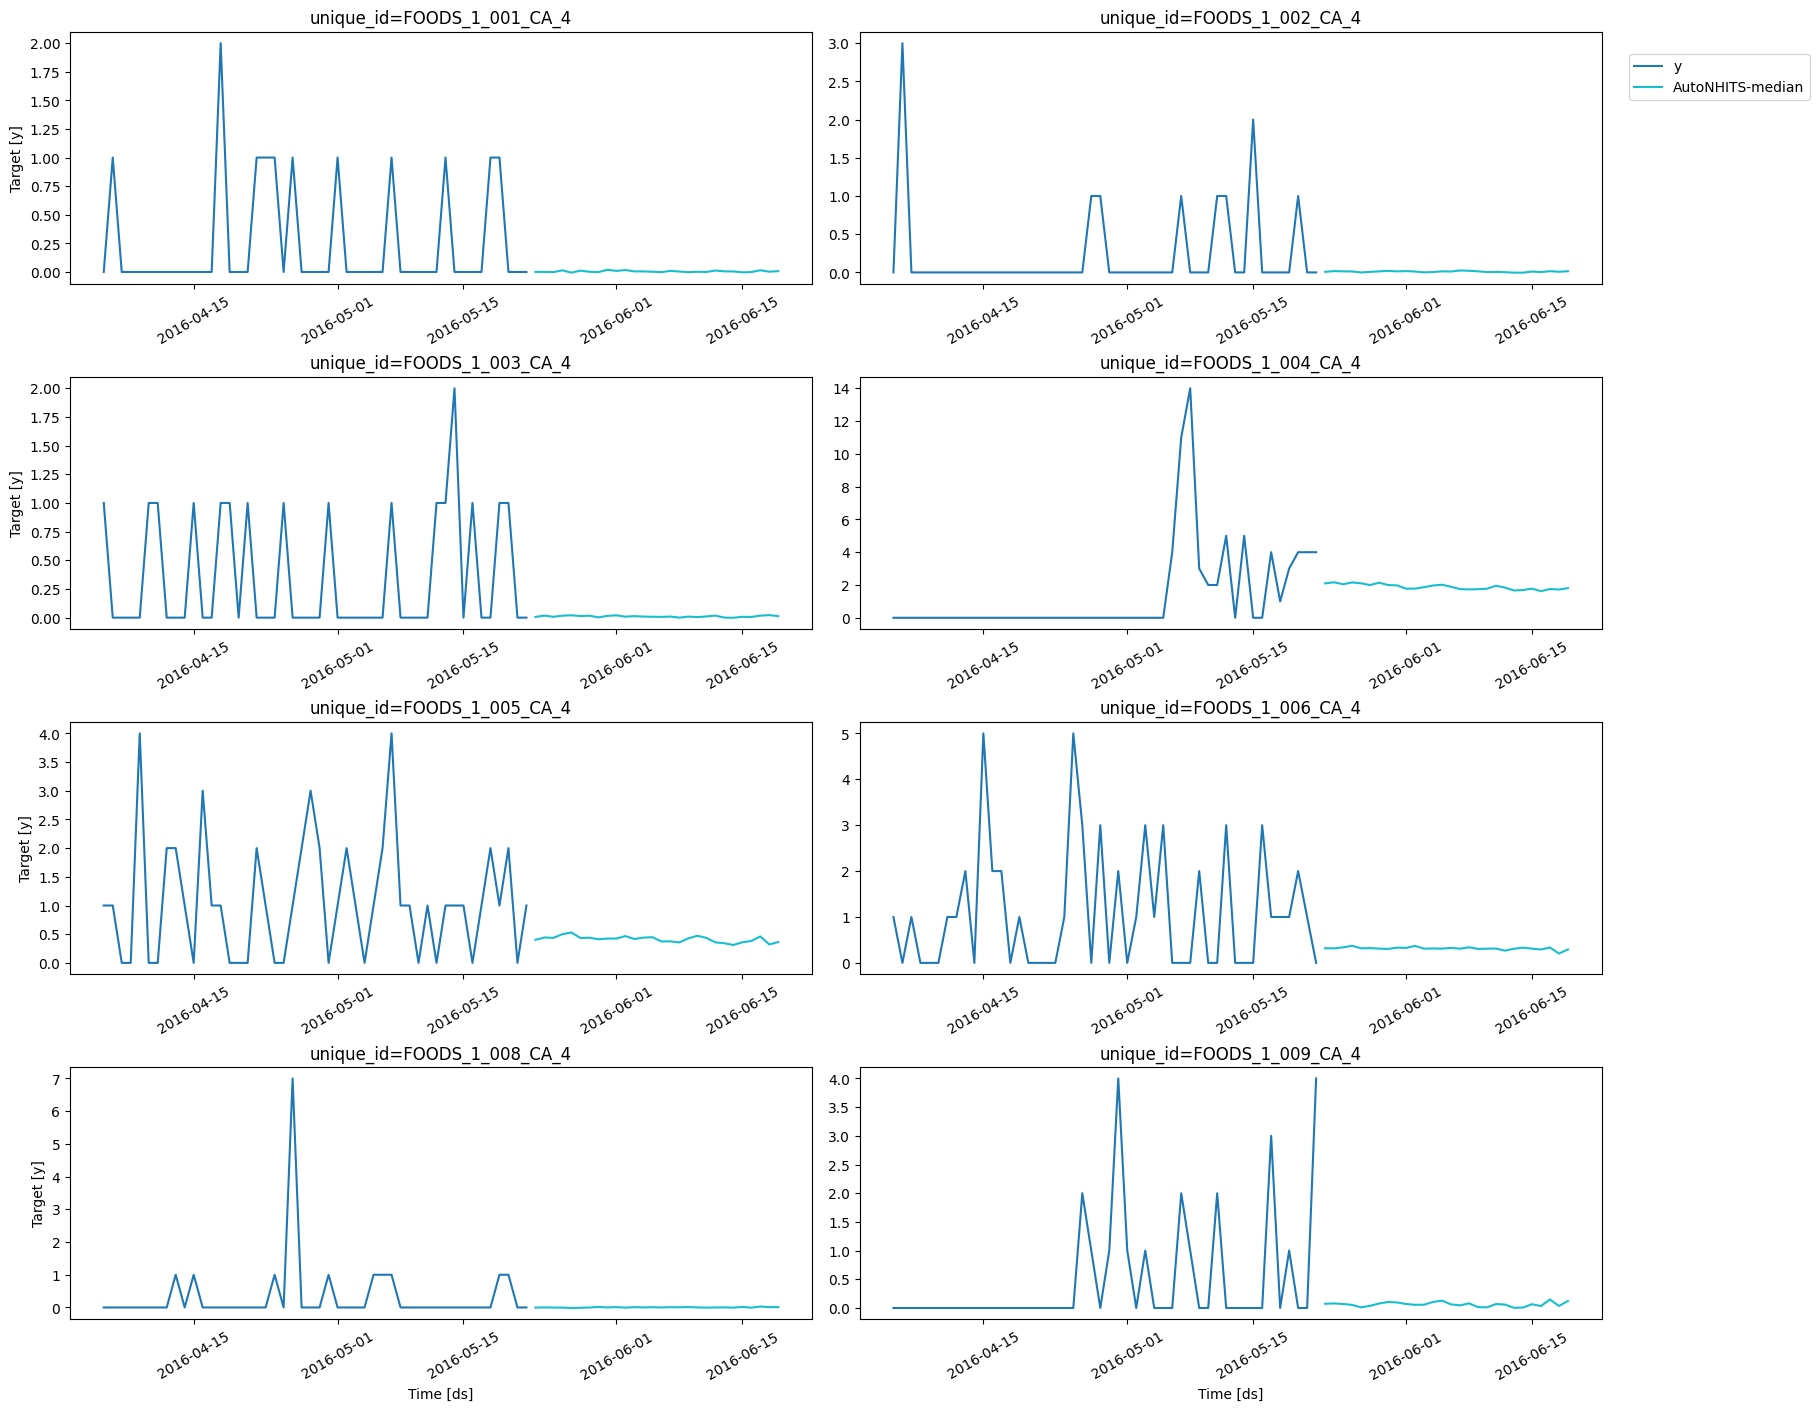

In [ ]:
plot_series(
    train,
    forecasts,
    plot_random=False,
    models=['AutoNHITS-median'],
    max_insample_length=48
)

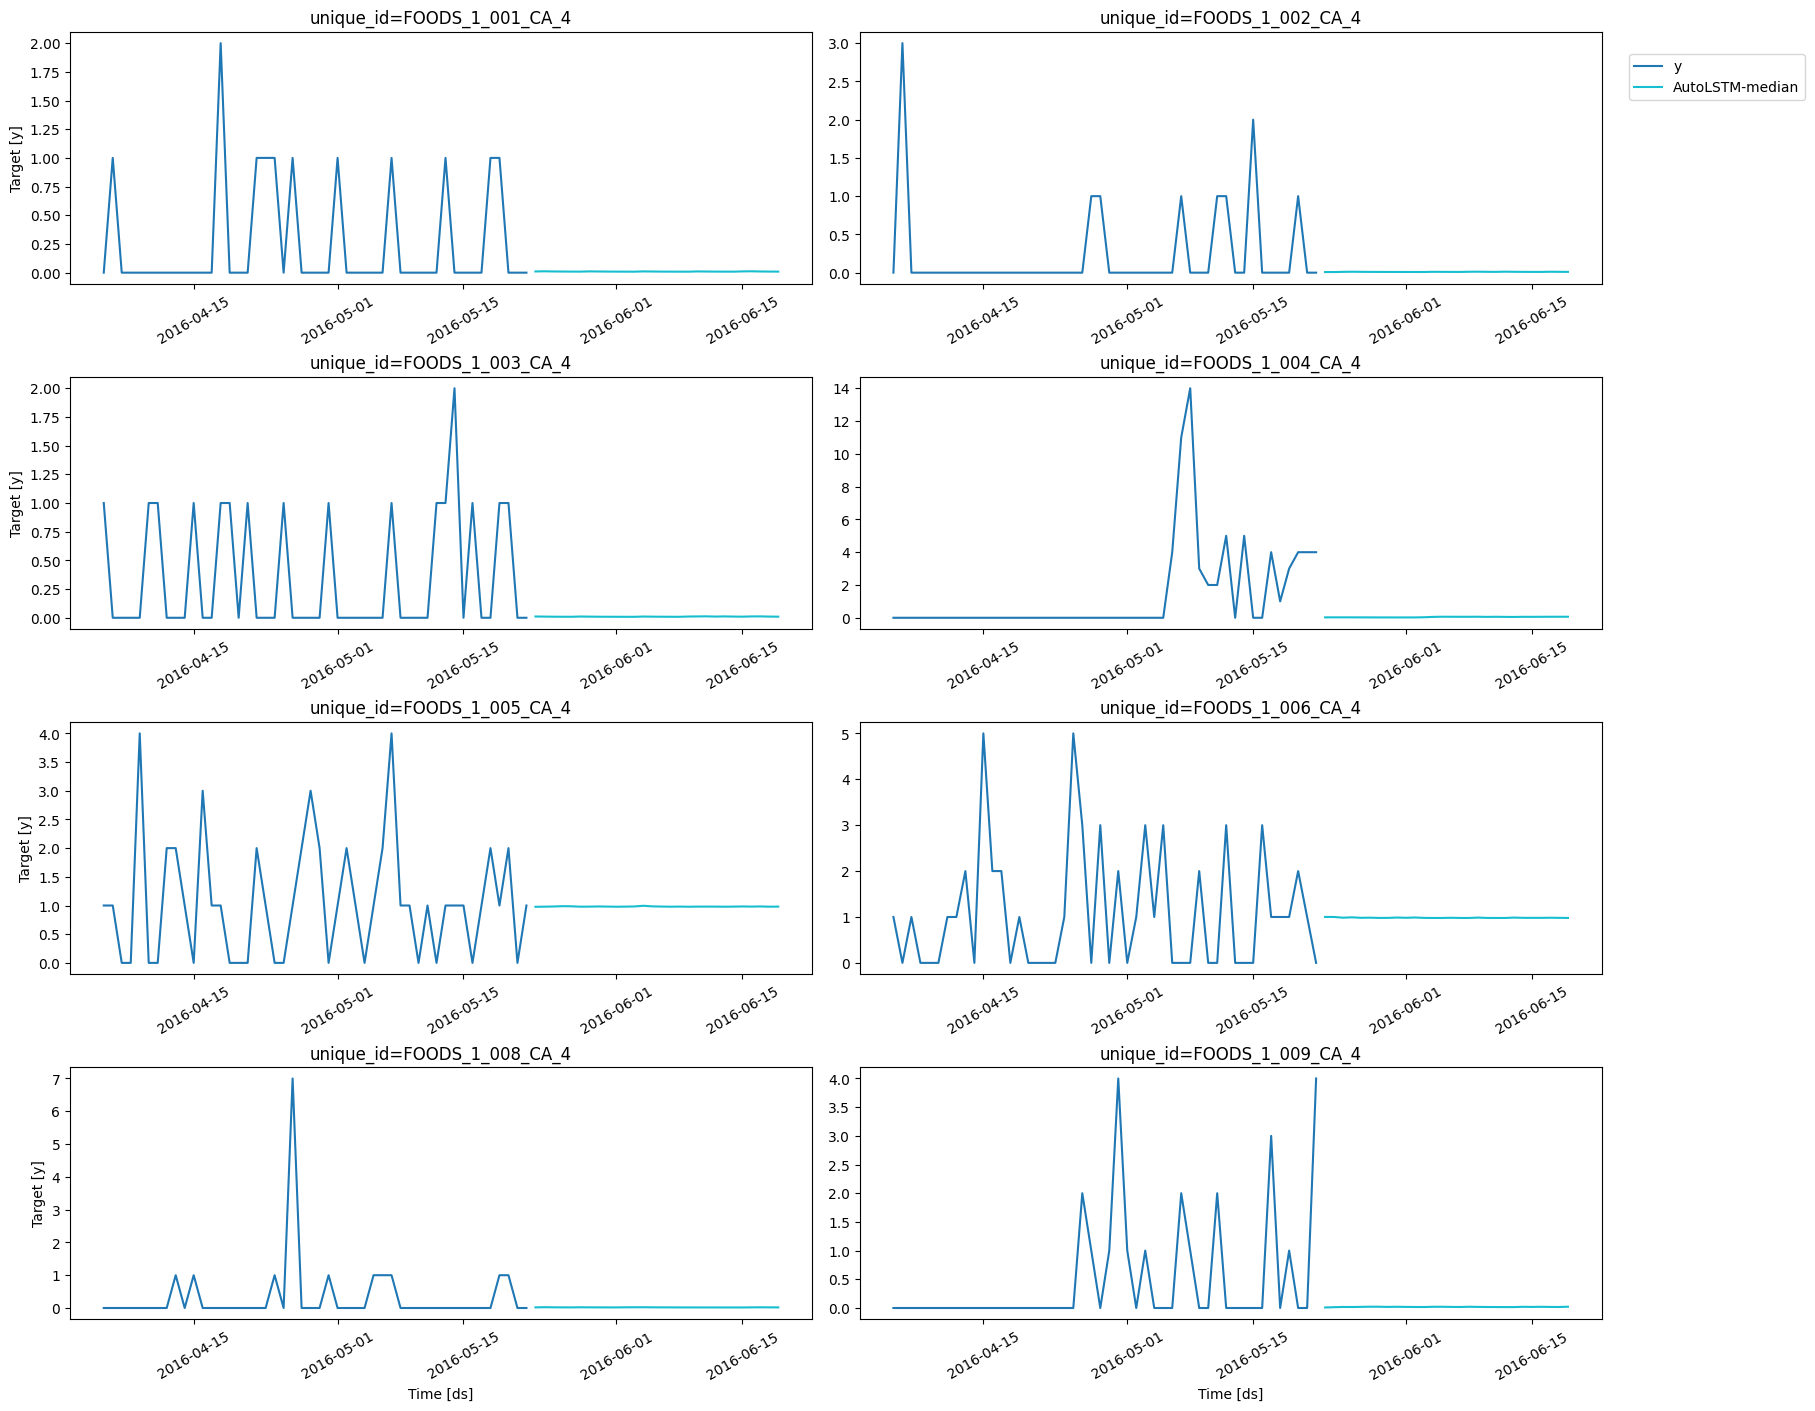

In [ ]:
plot_series(
    train,
    forecasts,
    plot_random=False,
    models=['AutoLSTM-median'],
    max_insample_length=48
)